In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
Train = pd.read_csv("train.csv")

In [4]:
Test = pd.read_csv("test.csv")

In [5]:
Train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [6]:
Train.shape

(341424, 24)

In [7]:
len(Train.reservation_id.unique())

341424

In [8]:
Train.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [9]:
Train.season_holidayed_code.unique()

array([ 2.,  3.,  4.,  1., nan])

In [10]:
stats.mode(Train.season_holidayed_code)

ModeResult(mode=array([2.]), count=array([126771]))

#### mode of "season_holidayed_code" is 2

In [11]:
Train.state_code_residence.unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27.,
       22., 19., 31., 34., 32., 30., 33., 29., 37., 35., 36., 38.])

In [12]:
np.sort(Train.state_code_residence.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., nan])

17 missing in state_code_residence

In [13]:
Test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [14]:
len(Test.reservation_id.unique())

146765

In [15]:
Test.shape

(146765, 23)

In [16]:
Test.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [17]:
stats.mode(Test.season_holidayed_code)

ModeResult(mode=array([2.]), count=array([54093]))

In [18]:
np.sort(Test.state_code_residence.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., nan])

#### Here also 17 is missing

In [19]:
len(Test.state_code_residence.unique())

38

In [20]:
y = Train.amount_spent_per_room_night_scaled

In [21]:
Train.drop(['amount_spent_per_room_night_scaled'],axis =1,inplace = True)

In [22]:
Train.shape

(341424, 23)

In [23]:
Total = pd.concat([Train,Test])

In [24]:
Total.shape

(488189, 23)

In [25]:
Total.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code        149
state_code_residence        7024
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [26]:
Total.season_holidayed_code.fillna(2.0,inplace=True)

In [27]:
Total.state_code_residence.fillna(17.0,inplace=True)

In [28]:
Total.isnull().sum()

reservation_id              0
booking_date                0
checkin_date                0
checkout_date               0
channel_code                0
main_product_code           0
numberofadults              0
numberofchildren            0
persontravellingid          0
resort_region_code          0
resort_type_code            0
room_type_booked_code       0
roomnights                  0
season_holidayed_code       0
state_code_residence        0
state_code_resort           0
total_pax                   0
member_age_buckets          0
booking_type_code           0
memberid                    0
cluster_code                0
reservationstatusid_code    0
resort_id                   0
dtype: int64

In [29]:

Total.dtypes

reservation_id               object
booking_date                 object
checkin_date                 object
checkout_date                object
channel_code                  int64
main_product_code             int64
numberofadults                int64
numberofchildren              int64
persontravellingid            int64
resort_region_code            int64
resort_type_code              int64
room_type_booked_code         int64
roomnights                    int64
season_holidayed_code       float64
state_code_residence        float64
state_code_resort             int64
total_pax                     int64
member_age_buckets           object
booking_type_code             int64
memberid                     object
cluster_code                 object
reservationstatusid_code     object
resort_id                    object
dtype: object

In [30]:
Total.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id'],
      dtype='object')

#### Lets find out the number of unique values in each feature.

In [31]:
for i in Total.columns:
    print(i,"-----" ,len(Total[i].unique()))

reservation_id ----- 488189
booking_date ----- 1624
checkin_date ----- 1534
checkout_date ----- 1533
channel_code ----- 3
main_product_code ----- 5
numberofadults ----- 29
numberofchildren ----- 13
persontravellingid ----- 6
resort_region_code ----- 3
resort_type_code ----- 7
room_type_booked_code ----- 6
roomnights ----- 48
season_holidayed_code ----- 4
state_code_residence ----- 38
state_code_resort ----- 11
total_pax ----- 18
member_age_buckets ----- 10
booking_type_code ----- 2
memberid ----- 144823
cluster_code ----- 6
reservationstatusid_code ----- 4
resort_id ----- 32


####  Reservation id, Member id are high in number.

In [32]:
Total.memberid.head()

0    3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...
1    3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...
2    3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...
3    3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...
4    3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...
Name: memberid, dtype: object

#### There is no relation between each memberid to form cluster

#### So, What to do what not to do!

----------------------------------------------------------------------------------------------------------------

reservation_id = remove since all are unique.

booking_date - checkin_date = advbook

checkin_date - checkout_date = stay

channel_code,main_product_code = category

numberofadults, numberofchildren = numeric

persontravellingid, resort_region_code, resort_type_code, room_type_booked_code = category

roomnights = numeric

season_holidayed_code, state_code_residence, state_code_resort = cate

total_pax= num

member_age_buckets, booking_type_code, cluster_code, reservationstatusid_code, resort_id = cate

memberid = remove since all are unique.

before removing them store it in a variable just in case


Create new feature by adding(numberofadults and numberofchildren) and multiplying that with roomnights

In [33]:
Total_reservation_id = Total.reservation_id
Total_memberid = Total.memberid

In [34]:
Total.drop(['reservation_id','memberid'],axis = 1, inplace = True)

In [35]:
Total.shape

(488189, 21)

In [36]:
Total.booking_date=pd.to_datetime(Total.booking_date, format='%d/%m/%y')
Total.checkin_date=pd.to_datetime(Total.checkin_date, format='%d/%m/%y')
Total.checkout_date=pd.to_datetime(Total.checkout_date, format='%d/%m/%y')

In [37]:
Total.dtypes

booking_date                datetime64[ns]
checkin_date                datetime64[ns]
checkout_date               datetime64[ns]
channel_code                         int64
main_product_code                    int64
numberofadults                       int64
numberofchildren                     int64
persontravellingid                   int64
resort_region_code                   int64
resort_type_code                     int64
room_type_booked_code                int64
roomnights                           int64
season_holidayed_code              float64
state_code_residence               float64
state_code_resort                    int64
total_pax                            int64
member_age_buckets                  object
booking_type_code                    int64
cluster_code                        object
reservationstatusid_code            object
resort_id                           object
dtype: object

In [39]:
Total['advbook']=(Total['checkin_date'].sub(Total['booking_date'], axis=0))/ np.timedelta64(1, 'D')

In [40]:
Total['stay']=(Total['checkout_date'].sub(Total['checkin_date'], axis=0))/ np.timedelta64(1, 'D')

In [41]:
Total_booking_date=Total.booking_date
Total_checkin_date=Total.checkin_date
Total_checkout_date=Total.checkout_date

In [42]:
Total.drop(['booking_date','checkin_date','checkout_date'],axis=1,inplace=True)

#### First I thought these dates didn't provide much information but later I have added them and this gave me better results.

In [143]:
Total['booking_date']=Total_booking_date
Total['checkin_date']=Total_checkin_date
Total['checkout_date']=Total_checkout_date

In [144]:
Total.dtypes

channel_code                        object
main_product_code                   object
numberofadults                       int64
numberofchildren                     int64
persontravellingid                  object
resort_region_code                  object
resort_type_code                    object
room_type_booked_code               object
roomnights                           int64
season_holidayed_code               object
state_code_residence                object
state_code_resort                   object
total_pax                            int64
member_age_buckets                  object
booking_type_code                   object
cluster_code                        object
reservationstatusid_code            object
resort_id                           object
advbook                            float64
stay                               float64
person_days                          int64
booking_date                datetime64[ns]
checkin_date                datetime64[ns]
checkout_da

In [145]:
Total.shape

(488189, 24)

#### Since there are many categorical features and in some features there are more number of categories I think Catboost is good for this problem.

#### For catboost we the categorical features should be in object data type(Not categorical data type) and we have to mention

#### these categorical feature indexes as an input to Catboost algorithm

In [146]:
for i in ['booking_date','checkin_date','checkout_date','channel_code','main_product_code','persontravellingid','resort_region_code','resort_type_code','room_type_booked_code','season_holidayed_code','state_code_residence','state_code_resort','member_age_buckets','booking_type_code','cluster_code','reservationstatusid_code','resort_id']:
     Total[i] = Total[i].astype(str)

In [147]:
Total.dtypes

channel_code                 object
main_product_code            object
numberofadults                int64
numberofchildren              int64
persontravellingid           object
resort_region_code           object
resort_type_code             object
room_type_booked_code        object
roomnights                    int64
season_holidayed_code        object
state_code_residence         object
state_code_resort            object
total_pax                     int64
member_age_buckets           object
booking_type_code            object
cluster_code                 object
reservationstatusid_code     object
resort_id                    object
advbook                     float64
stay                        float64
person_days                   int64
booking_date                 object
checkin_date                 object
checkout_date                object
dtype: object

In [148]:
for i in Total.columns:
    print(i,"-----" ,len(Total[i].unique()))

channel_code ----- 3
main_product_code ----- 5
numberofadults ----- 29
numberofchildren ----- 13
persontravellingid ----- 6
resort_region_code ----- 3
resort_type_code ----- 7
room_type_booked_code ----- 6
roomnights ----- 48
season_holidayed_code ----- 4
state_code_residence ----- 38
state_code_resort ----- 11
total_pax ----- 18
member_age_buckets ----- 10
booking_type_code ----- 2
cluster_code ----- 6
reservationstatusid_code ----- 4
resort_id ----- 32
advbook ----- 141
stay ----- 17
person_days ----- 232
booking_date ----- 1624
checkin_date ----- 1534
checkout_date ----- 1533


In [48]:
for i in ['numberofadults','numberofchildren','roomnights','total_pax']:
    print(i,"-----" ,(Total[i].unique()))

numberofadults ----- [ 2  4  3  8  6  7 13  5  1 10 15 11 12  9 24 16 14  0 20 32 19 18 17 23
 21 30 22 25 29]
numberofchildren ----- [ 0  2  3  4  1  6  8  5  7 10 12 13  9]
roomnights ----- [  1   5   4   2   6   3   8  12  16   9   7  10  14  15  11  22  18  25
  20  13  21  26  34  17  24  37  27  39  28 -45  19  23  29  30  36  60
  33  42  31  35  32   0  47  41  80  40  48  44]
total_pax ----- [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]


### roomnights: -45????!!! lets make it into 45.

In [49]:
Total.roomnights=Total.roomnights.replace(-45,45)

#### Lets add a new feature, the mail goal is to find the amount spent by customers. So, lets create a new feature by adding 

#### numberofadults and numberofchildren and multiply it with roomnights.

In [56]:
Total['person_days']=(Total['numberofadults']+Total['numberofchildren'])*Total.roomnights


In [57]:
Total.shape

(488189, 21)

#### Done with preprocessing now lets split it again(Back to original form)

In [151]:
Train_pre = Total.iloc[:341424,:] 
 #146765

In [152]:
Test_pre  = Total.iloc[341424:,:]

In [153]:
Train_pre.shape

(341424, 24)

In [154]:
Test_pre.shape

(146765, 24)

In [155]:
Test_pre.dtypes 

channel_code                 object
main_product_code            object
numberofadults                int64
numberofchildren              int64
persontravellingid           object
resort_region_code           object
resort_type_code             object
room_type_booked_code        object
roomnights                    int64
season_holidayed_code        object
state_code_residence         object
state_code_resort            object
total_pax                     int64
member_age_buckets           object
booking_type_code            object
cluster_code                 object
reservationstatusid_code     object
resort_id                    object
advbook                     float64
stay                        float64
person_days                   int64
booking_date                 object
checkin_date                 object
checkout_date                object
dtype: object

In [137]:
import matplotlib.pyplot as plt

In [138]:
%matplotlib inline

In [141]:
Total.describe()

,numberofadults,numberofchildren,roomnights,total_pax,advbook,stay
count,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000
mean,3.275522,0.362573,3.736133,3.191893,46.119677,2.466323
std,1.764458,0.758078,2.479779,1.166638,38.693097,1.094641
min,0.000000,0.000000,0.000000,0.000000,-2219.000000,1.000000
25%,2.000000,0.000000,2.000000,2.000000,15.000000,2.000000
50%,3.000000,0.000000,3.000000,3.000000,33.000000,2.000000
75%,4.000000,0.000000,4.000000,4.000000,82.000000,3.000000
max,32.000000,13.000000,80.000000,24.000000,177.000000,26.000000


In [143]:
y.describe()

count    341424.000000
mean          7.720801
std           1.090109
min           1.600397
25%           7.187260
50%           7.860814
75%           8.419144
max          10.816652
Name: amount_spent_per_room_night_scaled, dtype: float64

(array([   140.,    775.,   2965.,   7559.,  18641.,  50072., 121203.,
        109480.,  27472.,   3117.]),
 array([ 1.60039717,  2.52202265,  3.44364812,  4.3652736 ,  5.28689908,
         6.20852455,  7.13015003,  8.05177551,  8.97340099,  9.89502646,
        10.81665194]),
 <a list of 10 Patch objects>)

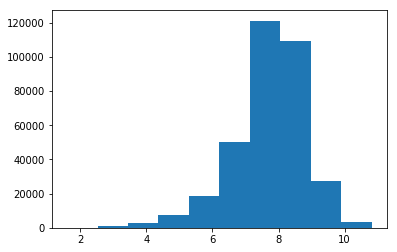

In [152]:
plt.hist(y)

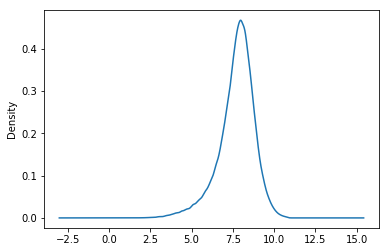

In [151]:
y.plot.kde()

In [63]:
from catboost import CatBoostRegressor

In [159]:
x=Train_pre

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, train_size=0.7, random_state=24)

In [162]:
categorical_features_indices = [0,1,4,5,6,7,9,10,11,13,14,15,16,17,21,22,23]

In [163]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [167]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7.0343827	test: 7.0319595	best: 7.0319595 (0)	total: 325ms	remaining: 5m 24s
1:	learn: 6.3487195	test: 6.3476834	best: 6.3476834 (1)	total: 508ms	remaining: 4m 13s
2:	learn: 5.7332286	test: 5.7321585	best: 5.7321585 (2)	total: 860ms	remaining: 4m 45s
3:	learn: 5.1816466	test: 5.1806394	best: 5.1806394 (3)	total: 1.08s	remaining: 4m 29s
4:	learn: 4.6875270	test: 4.6865827	best: 4.6865827 (4)	total: 1.34s	remaining: 4m 26s
5:	learn: 4.2453144	test: 4.2444616	best: 4.2444616 (5)	total: 1.49s	remaining: 4m 6s
6:	learn: 3.8500005	test: 3.8493451	best: 3.8493451 (6)	total: 1.77s	remaining: 4m 11s
7:	learn: 3.4969968	test: 3.4964506	best: 3.4964506 (7)	total: 2.04s	remaining: 4m 13s
8:	learn: 3.1806769	test: 3.1802021	best: 3.1802021 (8)	total: 2.33s	remaining: 4m 16s
9:	learn: 2.9010653	test: 2.9007195	best: 2.9007195 (9)	total: 2.38s	remaining: 3m 56s
10:	learn: 2.6512199	test: 2.6509816	best: 2.6509816 (10)	total: 2.6s	remaining: 3m 53s
11:	learn: 2.4317139	test: 2.4316202	best: 

93:	learn: 0.9895050	test: 0.9929607	best: 0.9929607 (93)	total: 24.5s	remaining: 3m 55s
94:	learn: 0.9894084	test: 0.9928718	best: 0.9928718 (94)	total: 24.7s	remaining: 3m 55s
95:	learn: 0.9893226	test: 0.9927760	best: 0.9927760 (95)	total: 25s	remaining: 3m 55s
96:	learn: 0.9892304	test: 0.9926974	best: 0.9926974 (96)	total: 25.2s	remaining: 3m 54s
97:	learn: 0.9890692	test: 0.9925135	best: 0.9925135 (97)	total: 25.5s	remaining: 3m 54s
98:	learn: 0.9888985	test: 0.9923730	best: 0.9923730 (98)	total: 25.8s	remaining: 3m 55s
99:	learn: 0.9887909	test: 0.9922581	best: 0.9922581 (99)	total: 26.1s	remaining: 3m 55s
100:	learn: 0.9887284	test: 0.9922027	best: 0.9922027 (100)	total: 26.4s	remaining: 3m 54s
101:	learn: 0.9886405	test: 0.9921195	best: 0.9921195 (101)	total: 26.6s	remaining: 3m 54s
102:	learn: 0.9885518	test: 0.9920336	best: 0.9920336 (102)	total: 26.9s	remaining: 3m 54s
103:	learn: 0.9884877	test: 0.9919910	best: 0.9919910 (103)	total: 27.2s	remaining: 3m 54s
104:	learn: 0.9

184:	learn: 0.9843891	test: 0.9881534	best: 0.9881534 (184)	total: 48.9s	remaining: 3m 35s
185:	learn: 0.9843616	test: 0.9881248	best: 0.9881248 (185)	total: 49.2s	remaining: 3m 35s
186:	learn: 0.9843470	test: 0.9881219	best: 0.9881219 (186)	total: 49.5s	remaining: 3m 35s
187:	learn: 0.9843213	test: 0.9881046	best: 0.9881046 (187)	total: 49.8s	remaining: 3m 35s
188:	learn: 0.9843055	test: 0.9880915	best: 0.9880915 (188)	total: 50.1s	remaining: 3m 34s
189:	learn: 0.9842885	test: 0.9880853	best: 0.9880853 (189)	total: 50.3s	remaining: 3m 34s
190:	learn: 0.9842691	test: 0.9880615	best: 0.9880615 (190)	total: 50.6s	remaining: 3m 34s
191:	learn: 0.9842262	test: 0.9880274	best: 0.9880274 (191)	total: 50.9s	remaining: 3m 34s
192:	learn: 0.9841798	test: 0.9879811	best: 0.9879811 (192)	total: 51.2s	remaining: 3m 33s
193:	learn: 0.9841620	test: 0.9879782	best: 0.9879782 (193)	total: 51.4s	remaining: 3m 33s
194:	learn: 0.9841244	test: 0.9879479	best: 0.9879479 (194)	total: 51.7s	remaining: 3m 33s

275:	learn: 0.9823864	test: 0.9865875	best: 0.9865875 (275)	total: 1m 13s	remaining: 3m 13s
276:	learn: 0.9823753	test: 0.9865766	best: 0.9865766 (276)	total: 1m 13s	remaining: 3m 12s
277:	learn: 0.9823703	test: 0.9865821	best: 0.9865766 (276)	total: 1m 14s	remaining: 3m 12s
278:	learn: 0.9823619	test: 0.9865695	best: 0.9865695 (278)	total: 1m 14s	remaining: 3m 12s
279:	learn: 0.9823398	test: 0.9865502	best: 0.9865502 (279)	total: 1m 14s	remaining: 3m 12s
280:	learn: 0.9823308	test: 0.9865385	best: 0.9865385 (280)	total: 1m 14s	remaining: 3m 11s
281:	learn: 0.9823219	test: 0.9865419	best: 0.9865385 (280)	total: 1m 15s	remaining: 3m 11s
282:	learn: 0.9823194	test: 0.9865432	best: 0.9865385 (280)	total: 1m 15s	remaining: 3m 11s
283:	learn: 0.9823049	test: 0.9865408	best: 0.9865385 (280)	total: 1m 15s	remaining: 3m 10s
284:	learn: 0.9822735	test: 0.9865187	best: 0.9865187 (284)	total: 1m 16s	remaining: 3m 10s
285:	learn: 0.9822674	test: 0.9865178	best: 0.9865178 (285)	total: 1m 16s	remain

365:	learn: 0.9812872	test: 0.9859570	best: 0.9859570 (365)	total: 1m 37s	remaining: 2m 49s
366:	learn: 0.9812790	test: 0.9859489	best: 0.9859489 (366)	total: 1m 38s	remaining: 2m 49s
367:	learn: 0.9812770	test: 0.9859450	best: 0.9859450 (367)	total: 1m 38s	remaining: 2m 49s
368:	learn: 0.9812720	test: 0.9859453	best: 0.9859450 (367)	total: 1m 38s	remaining: 2m 48s
369:	learn: 0.9812688	test: 0.9859433	best: 0.9859433 (369)	total: 1m 39s	remaining: 2m 48s
370:	learn: 0.9812328	test: 0.9859208	best: 0.9859208 (370)	total: 1m 39s	remaining: 2m 48s
371:	learn: 0.9812314	test: 0.9859216	best: 0.9859208 (370)	total: 1m 39s	remaining: 2m 48s
372:	learn: 0.9812279	test: 0.9859167	best: 0.9859167 (372)	total: 1m 39s	remaining: 2m 47s
373:	learn: 0.9812255	test: 0.9859152	best: 0.9859152 (373)	total: 1m 40s	remaining: 2m 47s
374:	learn: 0.9812173	test: 0.9859105	best: 0.9859105 (374)	total: 1m 40s	remaining: 2m 47s
375:	learn: 0.9811982	test: 0.9858945	best: 0.9858945 (375)	total: 1m 40s	remain

455:	learn: 0.9804650	test: 0.9855004	best: 0.9855004 (455)	total: 2m 2s	remaining: 2m 26s
456:	learn: 0.9804532	test: 0.9854871	best: 0.9854871 (456)	total: 2m 2s	remaining: 2m 25s
457:	learn: 0.9804500	test: 0.9854875	best: 0.9854871 (456)	total: 2m 3s	remaining: 2m 25s
458:	learn: 0.9804384	test: 0.9854756	best: 0.9854756 (458)	total: 2m 3s	remaining: 2m 25s
459:	learn: 0.9804239	test: 0.9854774	best: 0.9854756 (458)	total: 2m 3s	remaining: 2m 25s
460:	learn: 0.9804108	test: 0.9854771	best: 0.9854756 (458)	total: 2m 3s	remaining: 2m 24s
461:	learn: 0.9804063	test: 0.9854715	best: 0.9854715 (461)	total: 2m 4s	remaining: 2m 24s
462:	learn: 0.9803983	test: 0.9854595	best: 0.9854595 (462)	total: 2m 4s	remaining: 2m 24s
463:	learn: 0.9803979	test: 0.9854600	best: 0.9854595 (462)	total: 2m 4s	remaining: 2m 24s
464:	learn: 0.9803959	test: 0.9854600	best: 0.9854595 (462)	total: 2m 5s	remaining: 2m 23s
465:	learn: 0.9803941	test: 0.9854592	best: 0.9854592 (465)	total: 2m 5s	remaining: 2m 23s

545:	learn: 0.9798605	test: 0.9852023	best: 0.9852017 (544)	total: 2m 26s	remaining: 2m 1s
546:	learn: 0.9798571	test: 0.9851969	best: 0.9851969 (546)	total: 2m 26s	remaining: 2m 1s
547:	learn: 0.9798548	test: 0.9851958	best: 0.9851958 (547)	total: 2m 26s	remaining: 2m 1s
548:	learn: 0.9798382	test: 0.9851836	best: 0.9851836 (548)	total: 2m 27s	remaining: 2m
549:	learn: 0.9798369	test: 0.9851836	best: 0.9851836 (548)	total: 2m 27s	remaining: 2m
550:	learn: 0.9798179	test: 0.9851677	best: 0.9851677 (550)	total: 2m 27s	remaining: 2m
551:	learn: 0.9798075	test: 0.9851652	best: 0.9851652 (551)	total: 2m 28s	remaining: 2m
552:	learn: 0.9798000	test: 0.9851613	best: 0.9851613 (552)	total: 2m 28s	remaining: 1m 59s
553:	learn: 0.9797995	test: 0.9851610	best: 0.9851610 (553)	total: 2m 28s	remaining: 1m 59s
554:	learn: 0.9797940	test: 0.9851602	best: 0.9851602 (554)	total: 2m 28s	remaining: 1m 59s
555:	learn: 0.9797825	test: 0.9851543	best: 0.9851543 (555)	total: 2m 29s	remaining: 1m 59s
556:	le

635:	learn: 0.9792478	test: 0.9848952	best: 0.9848917 (632)	total: 2m 52s	remaining: 1m 38s
636:	learn: 0.9792422	test: 0.9848914	best: 0.9848914 (636)	total: 2m 53s	remaining: 1m 38s
637:	learn: 0.9792375	test: 0.9848887	best: 0.9848887 (637)	total: 2m 53s	remaining: 1m 38s
638:	learn: 0.9792290	test: 0.9848880	best: 0.9848880 (638)	total: 2m 53s	remaining: 1m 38s
639:	learn: 0.9792266	test: 0.9848853	best: 0.9848853 (639)	total: 2m 54s	remaining: 1m 37s
640:	learn: 0.9792197	test: 0.9848801	best: 0.9848801 (640)	total: 2m 54s	remaining: 1m 37s
641:	learn: 0.9792021	test: 0.9848840	best: 0.9848801 (640)	total: 2m 54s	remaining: 1m 37s
642:	learn: 0.9792000	test: 0.9848830	best: 0.9848801 (640)	total: 2m 55s	remaining: 1m 37s
643:	learn: 0.9791980	test: 0.9848858	best: 0.9848801 (640)	total: 2m 55s	remaining: 1m 36s
644:	learn: 0.9791858	test: 0.9848883	best: 0.9848801 (640)	total: 2m 55s	remaining: 1m 36s
645:	learn: 0.9791842	test: 0.9848880	best: 0.9848801 (640)	total: 2m 56s	remain

725:	learn: 0.9788093	test: 0.9847548	best: 0.9847483 (722)	total: 3m 19s	remaining: 1m 15s
726:	learn: 0.9788074	test: 0.9847545	best: 0.9847483 (722)	total: 3m 19s	remaining: 1m 15s
727:	learn: 0.9788048	test: 0.9847573	best: 0.9847483 (722)	total: 3m 20s	remaining: 1m 14s
728:	learn: 0.9788005	test: 0.9847574	best: 0.9847483 (722)	total: 3m 20s	remaining: 1m 14s
729:	learn: 0.9787895	test: 0.9847637	best: 0.9847483 (722)	total: 3m 20s	remaining: 1m 14s
730:	learn: 0.9787885	test: 0.9847629	best: 0.9847483 (722)	total: 3m 21s	remaining: 1m 14s
731:	learn: 0.9787872	test: 0.9847615	best: 0.9847483 (722)	total: 3m 21s	remaining: 1m 13s
732:	learn: 0.9787827	test: 0.9847579	best: 0.9847483 (722)	total: 3m 21s	remaining: 1m 13s
733:	learn: 0.9787788	test: 0.9847584	best: 0.9847483 (722)	total: 3m 21s	remaining: 1m 13s
734:	learn: 0.9787768	test: 0.9847582	best: 0.9847483 (722)	total: 3m 22s	remaining: 1m 12s
735:	learn: 0.9787635	test: 0.9847474	best: 0.9847474 (735)	total: 3m 22s	remain

816:	learn: 0.9783454	test: 0.9845736	best: 0.9845736 (816)	total: 3m 46s	remaining: 50.7s
817:	learn: 0.9783442	test: 0.9845750	best: 0.9845736 (816)	total: 3m 46s	remaining: 50.4s
818:	learn: 0.9783421	test: 0.9845752	best: 0.9845736 (816)	total: 3m 46s	remaining: 50.2s
819:	learn: 0.9783155	test: 0.9845689	best: 0.9845689 (819)	total: 3m 47s	remaining: 49.9s
820:	learn: 0.9783117	test: 0.9845620	best: 0.9845620 (820)	total: 3m 47s	remaining: 49.6s
821:	learn: 0.9783100	test: 0.9845613	best: 0.9845613 (821)	total: 3m 47s	remaining: 49.3s
822:	learn: 0.9783071	test: 0.9845621	best: 0.9845613 (821)	total: 3m 48s	remaining: 49.1s
823:	learn: 0.9783014	test: 0.9845600	best: 0.9845600 (823)	total: 3m 48s	remaining: 48.8s
824:	learn: 0.9782926	test: 0.9845602	best: 0.9845600 (823)	total: 3m 48s	remaining: 48.5s
825:	learn: 0.9782914	test: 0.9845605	best: 0.9845600 (823)	total: 3m 49s	remaining: 48.3s
826:	learn: 0.9782870	test: 0.9845565	best: 0.9845565 (826)	total: 3m 49s	remaining: 48s
8

907:	learn: 0.9779804	test: 0.9844668	best: 0.9844668 (907)	total: 4m 13s	remaining: 25.7s
908:	learn: 0.9779787	test: 0.9844657	best: 0.9844657 (908)	total: 4m 14s	remaining: 25.4s
909:	learn: 0.9779755	test: 0.9844657	best: 0.9844657 (908)	total: 4m 14s	remaining: 25.2s
910:	learn: 0.9779690	test: 0.9844588	best: 0.9844588 (910)	total: 4m 14s	remaining: 24.9s
911:	learn: 0.9779656	test: 0.9844547	best: 0.9844547 (911)	total: 4m 15s	remaining: 24.6s
912:	learn: 0.9779619	test: 0.9844528	best: 0.9844528 (912)	total: 4m 15s	remaining: 24.3s
913:	learn: 0.9779438	test: 0.9844419	best: 0.9844419 (913)	total: 4m 15s	remaining: 24.1s
914:	learn: 0.9779417	test: 0.9844426	best: 0.9844419 (913)	total: 4m 15s	remaining: 23.8s
915:	learn: 0.9779355	test: 0.9844426	best: 0.9844419 (913)	total: 4m 16s	remaining: 23.5s
916:	learn: 0.9779344	test: 0.9844434	best: 0.9844419 (913)	total: 4m 16s	remaining: 23.2s
917:	learn: 0.9779332	test: 0.9844445	best: 0.9844419 (913)	total: 4m 16s	remaining: 22.9s

998:	learn: 0.9775068	test: 0.9842956	best: 0.9842914 (996)	total: 4m 41s	remaining: 281ms
999:	learn: 0.9775020	test: 0.9842920	best: 0.9842914 (996)	total: 4m 41s	remaining: 0us

bestTest = 0.9842913719
bestIteration = 996

Shrink model to first 997 iterations.


#### From the above info iterations should be 1000 but while hyper-parameter tuning with multiple folds would take long time.

#### So, for final prediction I would use 1000 iterations and for now (for hyper-parameter tuning) I have used 100.

### iterations=100

In [168]:
param_test1 = {
 'depth':range(3,14,2)
}

In [169]:
gsearch1 = GridSearchCV(estimator = CatBoostRegressor(iterations=100,loss_function='RMSE',cat_features=categorical_features_indices),
 param_grid = param_test1, scoring='neg_mean_squared_error',cv=5)

In [170]:
gsearch1.fit(x,y)

0:	learn: 7.5859128	total: 293ms	remaining: 29.1s
1:	learn: 7.3630641	total: 602ms	remaining: 29.5s
2:	learn: 7.1470864	total: 886ms	remaining: 28.6s
3:	learn: 6.9377926	total: 1.12s	remaining: 26.9s
4:	learn: 6.7349378	total: 1.26s	remaining: 24s
5:	learn: 6.5383309	total: 1.41s	remaining: 22.1s
6:	learn: 6.3477804	total: 1.58s	remaining: 21s
7:	learn: 6.1631176	total: 1.64s	remaining: 18.8s
8:	learn: 5.9841567	total: 1.91s	remaining: 19.3s
9:	learn: 5.8107516	total: 1.98s	remaining: 17.8s
10:	learn: 5.6427323	total: 2.13s	remaining: 17.2s
11:	learn: 5.4797517	total: 2.37s	remaining: 17.4s
12:	learn: 5.3219974	total: 2.58s	remaining: 17.2s
13:	learn: 5.1690353	total: 2.84s	remaining: 17.4s
14:	learn: 5.0210251	total: 3.08s	remaining: 17.5s
15:	learn: 4.8776602	total: 3.22s	remaining: 16.9s
16:	learn: 4.7386319	total: 3.48s	remaining: 17s
17:	learn: 4.6041598	total: 3.71s	remaining: 16.9s
18:	learn: 4.4738729	total: 3.95s	remaining: 16.8s
19:	learn: 4.3476704	total: 4.21s	remaining: 16

62:	learn: 1.5477727	total: 12.8s	remaining: 7.49s
63:	learn: 1.5221193	total: 12.9s	remaining: 7.28s
64:	learn: 1.4982217	total: 13.1s	remaining: 7.07s
65:	learn: 1.4749964	total: 13.4s	remaining: 6.88s
66:	learn: 1.4530344	total: 13.6s	remaining: 6.71s
67:	learn: 1.4319117	total: 13.9s	remaining: 6.53s
68:	learn: 1.4116155	total: 14.1s	remaining: 6.32s
69:	learn: 1.3918217	total: 14.3s	remaining: 6.13s
70:	learn: 1.3733308	total: 14.5s	remaining: 5.92s
71:	learn: 1.3555955	total: 14.7s	remaining: 5.73s
72:	learn: 1.3385367	total: 15s	remaining: 5.53s
73:	learn: 1.3223857	total: 15.2s	remaining: 5.34s
74:	learn: 1.3065886	total: 15.4s	remaining: 5.15s
75:	learn: 1.2916629	total: 15.7s	remaining: 4.95s
76:	learn: 1.2776094	total: 15.8s	remaining: 4.73s
77:	learn: 1.2641466	total: 16s	remaining: 4.51s
78:	learn: 1.2514044	total: 16.2s	remaining: 4.31s
79:	learn: 1.2392254	total: 16.4s	remaining: 4.1s
80:	learn: 1.2274316	total: 16.6s	remaining: 3.9s
81:	learn: 1.2164436	total: 16.8s	rem

25:	learn: 3.6596297	total: 4.43s	remaining: 12.6s
26:	learn: 3.5595011	total: 4.65s	remaining: 12.6s
27:	learn: 3.4625774	total: 4.88s	remaining: 12.6s
28:	learn: 3.3689598	total: 5.09s	remaining: 12.5s
29:	learn: 3.2783880	total: 5.22s	remaining: 12.2s
30:	learn: 3.1908699	total: 5.43s	remaining: 12.1s
31:	learn: 3.1062712	total: 5.48s	remaining: 11.7s
32:	learn: 3.0244044	total: 5.73s	remaining: 11.6s
33:	learn: 2.9453702	total: 5.96s	remaining: 11.6s
34:	learn: 2.8685570	total: 6.19s	remaining: 11.5s
35:	learn: 2.7942073	total: 6.42s	remaining: 11.4s
36:	learn: 2.7228681	total: 6.57s	remaining: 11.2s
37:	learn: 2.6538594	total: 6.73s	remaining: 11s
38:	learn: 2.5873365	total: 6.97s	remaining: 10.9s
39:	learn: 2.5227615	total: 7.21s	remaining: 10.8s
40:	learn: 2.4603191	total: 7.44s	remaining: 10.7s
41:	learn: 2.3999493	total: 7.68s	remaining: 10.6s
42:	learn: 2.3422214	total: 7.86s	remaining: 10.4s
43:	learn: 2.2868126	total: 8.05s	remaining: 10.2s
44:	learn: 2.2329026	total: 8.3s	

87:	learn: 1.1446245	total: 18.1s	remaining: 2.46s
88:	learn: 1.1367290	total: 18.3s	remaining: 2.26s
89:	learn: 1.1291013	total: 18.5s	remaining: 2.06s
90:	learn: 1.1222401	total: 18.8s	remaining: 1.86s
91:	learn: 1.1153647	total: 19s	remaining: 1.65s
92:	learn: 1.1090725	total: 19.3s	remaining: 1.45s
93:	learn: 1.1029390	total: 19.5s	remaining: 1.24s
94:	learn: 1.0972688	total: 19.7s	remaining: 1.04s
95:	learn: 1.0917696	total: 20.1s	remaining: 835ms
96:	learn: 1.0864836	total: 20.2s	remaining: 626ms
97:	learn: 1.0815777	total: 20.5s	remaining: 418ms
98:	learn: 1.0770141	total: 20.7s	remaining: 209ms
99:	learn: 1.0724738	total: 21s	remaining: 0us
0:	learn: 7.5859218	total: 445ms	remaining: 44s
1:	learn: 7.3631899	total: 775ms	remaining: 38s
2:	learn: 7.1473100	total: 1.35s	remaining: 43.8s
3:	learn: 6.9380340	total: 1.55s	remaining: 37.1s
4:	learn: 6.7351664	total: 1.78s	remaining: 33.8s
5:	learn: 6.5385681	total: 2.27s	remaining: 35.6s
6:	learn: 6.3480260	total: 2.32s	remaining: 30.

51:	learn: 1.9090460	total: 14.2s	remaining: 13.1s
52:	learn: 1.8686092	total: 14.7s	remaining: 13s
53:	learn: 1.8304185	total: 15.1s	remaining: 12.8s
54:	learn: 1.7941212	total: 15.3s	remaining: 12.5s
55:	learn: 1.7585885	total: 15.7s	remaining: 12.4s
56:	learn: 1.7239503	total: 16.2s	remaining: 12.2s
57:	learn: 1.6910130	total: 16.7s	remaining: 12.1s
58:	learn: 1.6594018	total: 17.1s	remaining: 11.9s
59:	learn: 1.6288384	total: 17.5s	remaining: 11.7s
60:	learn: 1.6000619	total: 18s	remaining: 11.5s
61:	learn: 1.5720622	total: 18.5s	remaining: 11.3s
62:	learn: 1.5450999	total: 19s	remaining: 11.1s
63:	learn: 1.5192341	total: 19.4s	remaining: 10.9s
64:	learn: 1.4949416	total: 19.8s	remaining: 10.7s
65:	learn: 1.4712947	total: 20.2s	remaining: 10.4s
66:	learn: 1.4491819	total: 20.6s	remaining: 10.1s
67:	learn: 1.4273169	total: 21s	remaining: 9.9s
68:	learn: 1.4066358	total: 21.5s	remaining: 9.64s
69:	learn: 1.3868753	total: 21.9s	remaining: 9.39s
70:	learn: 1.3679117	total: 22.4s	remain

16:	learn: 4.7255776	total: 4.32s	remaining: 21.1s
17:	learn: 4.5914179	total: 4.37s	remaining: 19.9s
18:	learn: 4.4615048	total: 4.42s	remaining: 18.8s
19:	learn: 4.3356780	total: 4.66s	remaining: 18.6s
20:	learn: 4.2138954	total: 4.71s	remaining: 17.7s
21:	learn: 4.0960063	total: 4.84s	remaining: 17.1s
22:	learn: 3.9817698	total: 4.98s	remaining: 16.7s
23:	learn: 3.8712721	total: 5.38s	remaining: 17s
24:	learn: 3.7644005	total: 5.44s	remaining: 16.3s
25:	learn: 3.6609992	total: 5.76s	remaining: 16.4s
26:	learn: 3.5609675	total: 5.9s	remaining: 16s
27:	learn: 3.4641438	total: 6.27s	remaining: 16.1s
28:	learn: 3.3705671	total: 6.42s	remaining: 15.7s
29:	learn: 3.2794995	total: 6.74s	remaining: 15.7s
30:	learn: 3.1920070	total: 6.87s	remaining: 15.3s
31:	learn: 3.1074176	total: 7.01s	remaining: 14.9s
32:	learn: 3.0256868	total: 7.07s	remaining: 14.4s
33:	learn: 2.9457177	total: 7.51s	remaining: 14.6s
34:	learn: 2.8693168	total: 7.96s	remaining: 14.8s
35:	learn: 2.7946590	total: 8.47s	re

78:	learn: 1.2274357	total: 28.1s	remaining: 7.46s
79:	learn: 1.2149016	total: 28.5s	remaining: 7.13s
80:	learn: 1.2030020	total: 29s	remaining: 6.81s
81:	learn: 1.1921947	total: 29.3s	remaining: 6.44s
82:	learn: 1.1813864	total: 29.8s	remaining: 6.11s
83:	learn: 1.1712517	total: 30.2s	remaining: 5.76s
84:	learn: 1.1615466	total: 30.6s	remaining: 5.41s
85:	learn: 1.1524716	total: 31s	remaining: 5.05s
86:	learn: 1.1435923	total: 31.4s	remaining: 4.7s
87:	learn: 1.1354767	total: 31.9s	remaining: 4.35s
88:	learn: 1.1274868	total: 32.3s	remaining: 4s
89:	learn: 1.1199096	total: 32.8s	remaining: 3.64s
90:	learn: 1.1129839	total: 33.2s	remaining: 3.28s
91:	learn: 1.1061082	total: 33.7s	remaining: 2.93s
92:	learn: 1.0996859	total: 34.1s	remaining: 2.57s
93:	learn: 1.0936552	total: 34.5s	remaining: 2.2s
94:	learn: 1.0878850	total: 34.9s	remaining: 1.84s
95:	learn: 1.0823272	total: 35.4s	remaining: 1.47s
96:	learn: 1.0770308	total: 35.8s	remaining: 1.11s
97:	learn: 1.0720388	total: 36.2s	remain

42:	learn: 2.3439131	total: 16.5s	remaining: 21.8s
43:	learn: 2.2876511	total: 17.1s	remaining: 21.7s
44:	learn: 2.2335470	total: 17.6s	remaining: 21.5s
45:	learn: 2.1812025	total: 18.2s	remaining: 21.4s
46:	learn: 2.1311888	total: 18.9s	remaining: 21.3s
47:	learn: 2.0827112	total: 19.5s	remaining: 21.2s
48:	learn: 2.0361158	total: 20.2s	remaining: 21.1s
49:	learn: 1.9909783	total: 20.9s	remaining: 20.9s
50:	learn: 1.9476165	total: 21.4s	remaining: 20.5s
51:	learn: 1.9065334	total: 21.6s	remaining: 19.9s
52:	learn: 1.8662054	total: 22s	remaining: 19.5s
53:	learn: 1.8273290	total: 22.6s	remaining: 19.3s
54:	learn: 1.7907370	total: 22.9s	remaining: 18.8s
55:	learn: 1.7546067	total: 23.5s	remaining: 18.5s
56:	learn: 1.7200294	total: 24.2s	remaining: 18.2s
57:	learn: 1.6870758	total: 24.6s	remaining: 17.8s
58:	learn: 1.6561403	total: 24.8s	remaining: 17.3s
59:	learn: 1.6258227	total: 25.5s	remaining: 17s
60:	learn: 1.5975424	total: 25.7s	remaining: 16.4s
61:	learn: 1.5697248	total: 26.3s	r

4:	learn: 6.7167372	total: 2.05s	remaining: 39s
5:	learn: 6.5206004	total: 2.18s	remaining: 34.2s
6:	learn: 6.3305067	total: 2.27s	remaining: 30.2s
7:	learn: 6.1462831	total: 2.42s	remaining: 27.8s
8:	learn: 5.9677237	total: 2.57s	remaining: 26s
9:	learn: 5.7947252	total: 2.63s	remaining: 23.6s
10:	learn: 5.6270684	total: 3.09s	remaining: 25s
11:	learn: 5.4646534	total: 3.32s	remaining: 24.3s
12:	learn: 5.3073039	total: 3.76s	remaining: 25.2s
13:	learn: 5.1545309	total: 4s	remaining: 24.6s
14:	learn: 5.0067839	total: 4.61s	remaining: 26.1s
15:	learn: 4.8636515	total: 5.09s	remaining: 26.7s
16:	learn: 4.7249704	total: 5.63s	remaining: 27.5s
17:	learn: 4.5907600	total: 6.12s	remaining: 27.9s
18:	learn: 4.4607367	total: 6.62s	remaining: 28.2s
19:	learn: 4.3347728	total: 7.18s	remaining: 28.7s
20:	learn: 4.2128139	total: 7.53s	remaining: 28.3s
21:	learn: 4.0948852	total: 7.58s	remaining: 26.9s
22:	learn: 3.9807373	total: 7.63s	remaining: 25.5s
23:	learn: 3.8702627	total: 7.69s	remaining: 2

67:	learn: 1.4077898	total: 31.7s	remaining: 14.9s
68:	learn: 1.3868716	total: 32.5s	remaining: 14.6s
69:	learn: 1.3669564	total: 33.1s	remaining: 14.2s
70:	learn: 1.3479931	total: 33.9s	remaining: 13.8s
71:	learn: 1.3296884	total: 34.4s	remaining: 13.4s
72:	learn: 1.3121523	total: 35.1s	remaining: 13s
73:	learn: 1.2954957	total: 35.7s	remaining: 12.6s
74:	learn: 1.2795582	total: 36.4s	remaining: 12.1s
75:	learn: 1.2643394	total: 37s	remaining: 11.7s
76:	learn: 1.2501302	total: 37.6s	remaining: 11.2s
77:	learn: 1.2371755	total: 37.7s	remaining: 10.6s
78:	learn: 1.2241225	total: 38.4s	remaining: 10.2s
79:	learn: 1.2116363	total: 39.1s	remaining: 9.78s
80:	learn: 1.2001314	total: 39.8s	remaining: 9.33s
81:	learn: 1.1886573	total: 40.4s	remaining: 8.88s
82:	learn: 1.1776966	total: 41.1s	remaining: 8.43s
83:	learn: 1.1674747	total: 41.8s	remaining: 7.97s
84:	learn: 1.1579045	total: 42.5s	remaining: 7.51s
85:	learn: 1.1486870	total: 43.2s	remaining: 7.04s
86:	learn: 1.1398921	total: 43.9s	r

30:	learn: 3.1934719	total: 14.6s	remaining: 32.4s
31:	learn: 3.1088744	total: 14.9s	remaining: 31.6s
32:	learn: 3.0269727	total: 15.4s	remaining: 31.2s
33:	learn: 2.9476193	total: 15.8s	remaining: 30.6s
34:	learn: 2.8709513	total: 16.7s	remaining: 31s
35:	learn: 2.7965458	total: 17.3s	remaining: 30.7s
36:	learn: 2.7244509	total: 18.1s	remaining: 30.9s
37:	learn: 2.6549101	total: 19.1s	remaining: 31.2s
38:	learn: 2.5879391	total: 19.7s	remaining: 30.8s
39:	learn: 2.5238420	total: 19.9s	remaining: 29.9s
40:	learn: 2.4611073	total: 20.4s	remaining: 29.4s
41:	learn: 2.4011820	total: 21.4s	remaining: 29.5s
42:	learn: 2.3433802	total: 21.8s	remaining: 28.9s
43:	learn: 2.2871850	total: 22.6s	remaining: 28.8s
44:	learn: 2.2337107	total: 22.8s	remaining: 27.9s
45:	learn: 2.1813019	total: 23.5s	remaining: 27.5s
46:	learn: 2.1310642	total: 23.8s	remaining: 26.9s
47:	learn: 2.0822209	total: 24.4s	remaining: 26.4s
48:	learn: 2.0357474	total: 25.3s	remaining: 26.3s
49:	learn: 1.9912250	total: 25.7s

93:	learn: 1.1049900	total: 52.8s	remaining: 3.37s
94:	learn: 1.0991567	total: 53.7s	remaining: 2.82s
95:	learn: 1.0935197	total: 54.6s	remaining: 2.28s
96:	learn: 1.0883434	total: 55.5s	remaining: 1.72s
97:	learn: 1.0835755	total: 56.5s	remaining: 1.15s
98:	learn: 1.0788492	total: 57.4s	remaining: 579ms
99:	learn: 1.0742731	total: 58.3s	remaining: 0us
0:	learn: 7.5655891	total: 923ms	remaining: 1m 31s
1:	learn: 7.3433599	total: 1.7s	remaining: 1m 23s
2:	learn: 7.1279418	total: 2.26s	remaining: 1m 13s
3:	learn: 6.9191831	total: 2.85s	remaining: 1m 8s
4:	learn: 6.7166787	total: 2.98s	remaining: 56.6s
5:	learn: 6.5206065	total: 3.81s	remaining: 59.7s
6:	learn: 6.3304846	total: 3.96s	remaining: 52.5s
7:	learn: 6.1462419	total: 4s	remaining: 46s
8:	learn: 5.9676686	total: 4.53s	remaining: 45.8s
9:	learn: 5.7946521	total: 4.59s	remaining: 41.3s
10:	learn: 5.6268964	total: 5.41s	remaining: 43.8s
11:	learn: 5.4644259	total: 5.63s	remaining: 41.3s
12:	learn: 5.3069421	total: 6.49s	remaining: 4

55:	learn: 1.7401005	total: 26.7s	remaining: 21s
56:	learn: 1.7065167	total: 26.8s	remaining: 20.2s
57:	learn: 1.6730526	total: 27.7s	remaining: 20.1s
58:	learn: 1.6419576	total: 27.9s	remaining: 19.4s
59:	learn: 1.6116216	total: 28.7s	remaining: 19.1s
60:	learn: 1.5818329	total: 29.4s	remaining: 18.8s
61:	learn: 1.5535218	total: 30.3s	remaining: 18.6s
62:	learn: 1.5268097	total: 30.6s	remaining: 18s
63:	learn: 1.5006592	total: 31.6s	remaining: 17.8s
64:	learn: 1.4755436	total: 32.5s	remaining: 17.5s
65:	learn: 1.4517683	total: 33.4s	remaining: 17.2s
66:	learn: 1.4288625	total: 34.2s	remaining: 16.9s
67:	learn: 1.4070738	total: 35.2s	remaining: 16.5s
68:	learn: 1.3862799	total: 35.8s	remaining: 16.1s
69:	learn: 1.3661987	total: 36.6s	remaining: 15.7s
70:	learn: 1.3472509	total: 37.6s	remaining: 15.3s
71:	learn: 1.3291041	total: 38.5s	remaining: 15s
72:	learn: 1.3123632	total: 38.7s	remaining: 14.3s
73:	learn: 1.2965950	total: 38.7s	remaining: 13.6s
74:	learn: 1.2805606	total: 39.3s	rem

17:	learn: 4.5935246	total: 11.5s	remaining: 52.3s
18:	learn: 4.4635856	total: 11.7s	remaining: 50s
19:	learn: 4.3371982	total: 12.5s	remaining: 50s
20:	learn: 4.2153741	total: 12.7s	remaining: 47.6s
21:	learn: 4.0972804	total: 12.8s	remaining: 45.5s
22:	learn: 3.9828241	total: 13.3s	remaining: 44.6s
23:	learn: 3.8721081	total: 14.9s	remaining: 47.2s
24:	learn: 3.7651794	total: 15s	remaining: 44.9s
25:	learn: 3.6616719	total: 15.2s	remaining: 43.4s
26:	learn: 3.5615655	total: 16.9s	remaining: 45.7s
27:	learn: 3.4647325	total: 17s	remaining: 43.8s
28:	learn: 3.3711012	total: 17.4s	remaining: 42.7s
29:	learn: 3.2803262	total: 18.3s	remaining: 42.8s
30:	learn: 3.1927861	total: 18.4s	remaining: 40.9s
31:	learn: 3.1081670	total: 19s	remaining: 40.4s
32:	learn: 3.0262854	total: 19.1s	remaining: 38.9s
33:	learn: 2.9468646	total: 20.7s	remaining: 40.2s
34:	learn: 2.8705207	total: 21.7s	remaining: 40.4s
35:	learn: 2.7963015	total: 23.4s	remaining: 41.7s
36:	learn: 2.7243984	total: 23.8s	remaini

79:	learn: 1.2239765	total: 1m 17s	remaining: 19.4s
80:	learn: 1.2119770	total: 1m 19s	remaining: 18.6s
81:	learn: 1.2006680	total: 1m 21s	remaining: 17.8s
82:	learn: 1.1898852	total: 1m 21s	remaining: 16.8s
83:	learn: 1.1796555	total: 1m 23s	remaining: 15.9s
84:	learn: 1.1701231	total: 1m 23s	remaining: 14.8s
85:	learn: 1.1613964	total: 1m 24s	remaining: 13.7s
86:	learn: 1.1531309	total: 1m 24s	remaining: 12.6s
87:	learn: 1.1449713	total: 1m 24s	remaining: 11.6s
88:	learn: 1.1370250	total: 1m 25s	remaining: 10.6s
89:	learn: 1.1293153	total: 1m 27s	remaining: 9.7s
90:	learn: 1.1221196	total: 1m 28s	remaining: 8.8s
91:	learn: 1.1153920	total: 1m 30s	remaining: 7.88s
92:	learn: 1.1089496	total: 1m 32s	remaining: 6.95s
93:	learn: 1.1028682	total: 1m 34s	remaining: 6.01s
94:	learn: 1.0970335	total: 1m 35s	remaining: 5.03s
95:	learn: 1.0916293	total: 1m 36s	remaining: 4.02s
96:	learn: 1.0863095	total: 1m 38s	remaining: 3.04s
97:	learn: 1.0815853	total: 1m 38s	remaining: 2.01s
98:	learn: 1.0

41:	learn: 2.3884477	total: 23.4s	remaining: 32.4s
42:	learn: 2.3302407	total: 25.2s	remaining: 33.5s
43:	learn: 2.2746702	total: 25.4s	remaining: 32.3s
44:	learn: 2.2207600	total: 25.6s	remaining: 31.2s
45:	learn: 2.1686725	total: 27.3s	remaining: 32s
46:	learn: 2.1180243	total: 28.9s	remaining: 32.6s
47:	learn: 2.0691955	total: 30s	remaining: 32.5s
48:	learn: 2.0222056	total: 31.8s	remaining: 33.1s
49:	learn: 1.9770293	total: 32.6s	remaining: 32.6s
50:	learn: 1.9333677	total: 34.6s	remaining: 33.2s
51:	learn: 1.8916831	total: 35.4s	remaining: 32.7s
52:	learn: 1.8514561	total: 35.7s	remaining: 31.7s
53:	learn: 1.8122338	total: 37.8s	remaining: 32.2s
54:	learn: 1.7749210	total: 40.4s	remaining: 33s
55:	learn: 1.7391730	total: 42.2s	remaining: 33.1s
56:	learn: 1.7046669	total: 44.1s	remaining: 33.3s
57:	learn: 1.6717823	total: 46.1s	remaining: 33.4s
58:	learn: 1.6405428	total: 46.4s	remaining: 32.2s
59:	learn: 1.6097781	total: 47.7s	remaining: 31.8s
60:	learn: 1.5798922	total: 49.3s	rem

2:	learn: 7.1307269	total: 1.85s	remaining: 59.8s
3:	learn: 6.9219149	total: 2.59s	remaining: 1m 2s
4:	learn: 6.7194953	total: 3.26s	remaining: 1m 1s
5:	learn: 6.5233263	total: 3.42s	remaining: 53.7s
6:	learn: 6.3332478	total: 4.78s	remaining: 1m 3s
7:	learn: 6.1490569	total: 7.49s	remaining: 1m 26s
8:	learn: 5.9704799	total: 7.76s	remaining: 1m 18s
9:	learn: 5.7973957	total: 9.18s	remaining: 1m 22s
10:	learn: 5.6296860	total: 9.65s	remaining: 1m 18s
11:	learn: 5.4673346	total: 11.8s	remaining: 1m 26s
12:	learn: 5.3099495	total: 11.9s	remaining: 1m 19s
13:	learn: 5.1574524	total: 13.6s	remaining: 1m 23s
14:	learn: 5.0096707	total: 15.5s	remaining: 1m 28s
15:	learn: 4.8664970	total: 16s	remaining: 1m 24s
16:	learn: 4.7279243	total: 16.6s	remaining: 1m 21s
17:	learn: 4.5937295	total: 17s	remaining: 1m 17s
18:	learn: 4.4637686	total: 19.6s	remaining: 1m 23s
19:	learn: 4.3379144	total: 20.3s	remaining: 1m 21s
20:	learn: 4.2160945	total: 20.3s	remaining: 1m 16s
21:	learn: 4.0981689	total: 2

64:	learn: 1.4911746	total: 56.2s	remaining: 30.3s
65:	learn: 1.4673943	total: 57.1s	remaining: 29.4s
66:	learn: 1.4445549	total: 59.9s	remaining: 29.5s
67:	learn: 1.4230245	total: 1m	remaining: 28.4s
68:	learn: 1.4019574	total: 1m 2s	remaining: 28.1s
69:	learn: 1.3818862	total: 1m 3s	remaining: 27.1s
70:	learn: 1.3633629	total: 1m 3s	remaining: 26.1s
71:	learn: 1.3451494	total: 1m 6s	remaining: 26s
72:	learn: 1.3276617	total: 1m 7s	remaining: 25s
73:	learn: 1.3111096	total: 1m 8s	remaining: 24s
74:	learn: 1.2950183	total: 1m 11s	remaining: 23.7s
75:	learn: 1.2799227	total: 1m 14s	remaining: 23.4s
76:	learn: 1.2656783	total: 1m 14s	remaining: 22.2s
77:	learn: 1.2520480	total: 1m 15s	remaining: 21.4s
78:	learn: 1.2388602	total: 1m 18s	remaining: 20.8s
79:	learn: 1.2262084	total: 1m 20s	remaining: 20.1s
80:	learn: 1.2140582	total: 1m 23s	remaining: 19.5s
81:	learn: 1.2026934	total: 1m 26s	remaining: 18.9s
82:	learn: 1.1918115	total: 1m 29s	remaining: 18.3s
83:	learn: 1.1812741	total: 1m 

25:	learn: 3.6481219	total: 23.6s	remaining: 1m 7s
26:	learn: 3.5478244	total: 24.7s	remaining: 1m 6s
27:	learn: 3.4509028	total: 26.4s	remaining: 1m 7s
28:	learn: 3.3572133	total: 26.8s	remaining: 1m 5s
29:	learn: 3.2660433	total: 30s	remaining: 1m 10s
30:	learn: 3.1785112	total: 30.1s	remaining: 1m 7s
31:	learn: 3.0935666	total: 31s	remaining: 1m 5s
32:	learn: 3.0113327	total: 33.7s	remaining: 1m 8s
33:	learn: 2.9320335	total: 34.1s	remaining: 1m 6s
34:	learn: 2.8556389	total: 34.5s	remaining: 1m 4s
35:	learn: 2.7814074	total: 34.9s	remaining: 1m 2s
36:	learn: 2.7101309	total: 35.1s	remaining: 59.7s
37:	learn: 2.6413110	total: 35.2s	remaining: 57.4s
38:	learn: 2.5748581	total: 36s	remaining: 56.3s
39:	learn: 2.5103266	total: 37.2s	remaining: 55.9s
40:	learn: 2.4483728	total: 37.8s	remaining: 54.4s
41:	learn: 2.3882101	total: 38s	remaining: 52.4s
42:	learn: 2.3303448	total: 41.4s	remaining: 54.9s
43:	learn: 2.2748484	total: 41.6s	remaining: 52.9s
44:	learn: 2.2203731	total: 44.1s	rema

86:	learn: 1.1495135	total: 2m 21s	remaining: 21.2s
87:	learn: 1.1409924	total: 2m 25s	remaining: 19.8s
88:	learn: 1.1328069	total: 2m 28s	remaining: 18.3s
89:	learn: 1.1251200	total: 2m 31s	remaining: 16.9s
90:	learn: 1.1178502	total: 2m 35s	remaining: 15.4s
91:	learn: 1.1109629	total: 2m 38s	remaining: 13.8s
92:	learn: 1.1043075	total: 2m 42s	remaining: 12.2s
93:	learn: 1.0980370	total: 2m 45s	remaining: 10.6s
94:	learn: 1.0927183	total: 2m 45s	remaining: 8.72s
95:	learn: 1.0870065	total: 2m 48s	remaining: 7.03s
96:	learn: 1.0816761	total: 2m 52s	remaining: 5.32s
97:	learn: 1.0765987	total: 2m 55s	remaining: 3.58s
98:	learn: 1.0716084	total: 2m 58s	remaining: 1.81s
99:	learn: 1.0668747	total: 3m 1s	remaining: 0us


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000022C80007208>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': range(3, 14, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [171]:
gsearch1.best_params_

{'depth': 13}

In [172]:
gsearch1.best_score_ 

-1.1455229797802016

In [173]:
gsearch1.cv_results_

C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([ 25.51310458,  40.91515656,  54.61779203,  65.33821125,
        104.57422109, 148.9999012 ]),
 'std_fit_time': array([0.61623874, 1.45502655, 1.65085402, 2.21223728, 5.55649487,
        9.18279737]),
 'mean_score_time': array([0.71043973, 0.69509931, 0.72072134, 0.75078025, 0.7981452 ,
        0.80873313]),
 'std_score_time': array([0.0511755 , 0.04917582, 0.05096289, 0.01052733, 0.03284724,
        0.08754066]),
 'param_depth': masked_array(data=[3, 5, 7, 9, 11, 13],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'depth': 3},
  {'depth': 5},
  {'depth': 7},
  {'depth': 9},
  {'depth': 11},
  {'depth': 13}],
 'split0_test_score': array([-1.07082006, -1.05205043, -1.04544358, -1.04368612, -1.04222443,
        -1.0406934 ]),
 'split1_test_score': array([-1.14237122, -1.1217226 , -1.11104311, -1.10547587, -1.10577842,
        -1.10195861]),
 'split2_test_score': array([-1.13969446, -1

### iterations=100, depth =13

In [174]:
param_test1_a = {
 'depth':[12,13,14]
}

In [175]:
gsearch1_a = GridSearchCV(estimator = CatBoostRegressor(iterations=100,loss_function='RMSE',cat_features=categorical_features_indices),
 param_grid = param_test1_a, scoring='neg_mean_squared_error',cv=5)

In [176]:
gsearch1_a.fit(x,y)

0:	learn: 7.5859218	total: 510ms	remaining: 50.5s
1:	learn: 7.3631899	total: 795ms	remaining: 39s
2:	learn: 7.1473100	total: 1.47s	remaining: 47.5s
3:	learn: 6.9380318	total: 3.68s	remaining: 1m 28s
4:	learn: 6.7352182	total: 5.22s	remaining: 1m 39s
5:	learn: 6.5386185	total: 5.94s	remaining: 1m 33s
6:	learn: 6.3480746	total: 6.36s	remaining: 1m 24s
7:	learn: 6.1633300	total: 6.72s	remaining: 1m 17s
8:	learn: 5.9843466	total: 8.77s	remaining: 1m 28s
9:	learn: 5.8109276	total: 8.94s	remaining: 1m 20s
10:	learn: 5.6428913	total: 8.99s	remaining: 1m 12s
11:	learn: 5.4801246	total: 10.2s	remaining: 1m 15s
12:	learn: 5.3223214	total: 11.1s	remaining: 1m 14s
13:	learn: 5.1695119	total: 11.1s	remaining: 1m 8s
14:	learn: 5.0214608	total: 11.5s	remaining: 1m 4s
15:	learn: 4.8780213	total: 12.3s	remaining: 1m 4s
16:	learn: 4.7391593	total: 14s	remaining: 1m 8s
17:	learn: 4.6045469	total: 14.9s	remaining: 1m 8s
18:	learn: 4.4742364	total: 15.2s	remaining: 1m 4s
19:	learn: 4.3479700	total: 16.8s	r

63:	learn: 1.5158197	total: 1m	remaining: 33.9s
64:	learn: 1.4910586	total: 1m 1s	remaining: 33s
65:	learn: 1.4671081	total: 1m 3s	remaining: 32.6s
66:	learn: 1.4444636	total: 1m 5s	remaining: 32.4s
67:	learn: 1.4227202	total: 1m 6s	remaining: 31.2s
68:	learn: 1.4021416	total: 1m 6s	remaining: 30s
69:	learn: 1.3820389	total: 1m 9s	remaining: 29.6s
70:	learn: 1.3629371	total: 1m 11s	remaining: 29.2s
71:	learn: 1.3447281	total: 1m 13s	remaining: 28.6s
72:	learn: 1.3274298	total: 1m 14s	remaining: 27.4s
73:	learn: 1.3108886	total: 1m 16s	remaining: 26.9s
74:	learn: 1.2949499	total: 1m 18s	remaining: 26.2s
75:	learn: 1.2797666	total: 1m 20s	remaining: 25.5s
76:	learn: 1.2653319	total: 1m 23s	remaining: 24.8s
77:	learn: 1.2514591	total: 1m 25s	remaining: 24.1s
78:	learn: 1.2384134	total: 1m 26s	remaining: 23s
79:	learn: 1.2259594	total: 1m 28s	remaining: 22.2s
80:	learn: 1.2139340	total: 1m 30s	remaining: 21.3s
81:	learn: 1.2026845	total: 1m 32s	remaining: 20.4s
82:	learn: 1.1918832	total: 

25:	learn: 3.6593807	total: 12.7s	remaining: 36.2s
26:	learn: 3.5592396	total: 13s	remaining: 35.1s
27:	learn: 3.4624224	total: 13.1s	remaining: 33.6s
28:	learn: 3.3686118	total: 14.3s	remaining: 35s
29:	learn: 3.2780633	total: 14.4s	remaining: 33.5s
30:	learn: 3.1898660	total: 14.8s	remaining: 33s
31:	learn: 3.1051368	total: 15.1s	remaining: 32s
32:	learn: 3.0233350	total: 15.3s	remaining: 31s
33:	learn: 2.9440095	total: 15.8s	remaining: 30.7s
34:	learn: 2.8673399	total: 16.4s	remaining: 30.5s
35:	learn: 2.7928236	total: 18.5s	remaining: 32.9s
36:	learn: 2.7215542	total: 18.6s	remaining: 31.6s
37:	learn: 2.6527490	total: 18.6s	remaining: 30.4s
38:	learn: 2.5862544	total: 18.8s	remaining: 29.5s
39:	learn: 2.5217320	total: 19.4s	remaining: 29.1s
40:	learn: 2.4597475	total: 19.5s	remaining: 28.1s
41:	learn: 2.3993736	total: 20.2s	remaining: 27.8s
42:	learn: 2.3411078	total: 22.6s	remaining: 29.9s
43:	learn: 2.2847782	total: 23s	remaining: 29.3s
44:	learn: 2.2303211	total: 24.1s	remaining

86:	learn: 1.1383378	total: 1m 26s	remaining: 12.9s
87:	learn: 1.1297505	total: 1m 28s	remaining: 12.1s
88:	learn: 1.1215778	total: 1m 30s	remaining: 11.2s
89:	learn: 1.1138792	total: 1m 32s	remaining: 10.3s
90:	learn: 1.1064974	total: 1m 34s	remaining: 9.38s
91:	learn: 1.0996280	total: 1m 36s	remaining: 8.41s
92:	learn: 1.0932277	total: 1m 37s	remaining: 7.37s
93:	learn: 1.0868113	total: 1m 39s	remaining: 6.37s
94:	learn: 1.0808562	total: 1m 42s	remaining: 5.38s
95:	learn: 1.0752502	total: 1m 44s	remaining: 4.35s
96:	learn: 1.0699370	total: 1m 46s	remaining: 3.29s
97:	learn: 1.0647985	total: 1m 48s	remaining: 2.21s
98:	learn: 1.0599634	total: 1m 50s	remaining: 1.12s
99:	learn: 1.0552987	total: 1m 52s	remaining: 0us
0:	learn: 7.5859218	total: 478ms	remaining: 47.3s
1:	learn: 7.3631899	total: 770ms	remaining: 37.7s
2:	learn: 7.1473100	total: 1.42s	remaining: 45.9s
3:	learn: 6.9380318	total: 4.42s	remaining: 1m 46s
4:	learn: 6.7351643	total: 5.14s	remaining: 1m 37s
5:	learn: 6.5385085	to

47:	learn: 2.0839880	total: 40.9s	remaining: 44.3s
48:	learn: 2.0371036	total: 41.4s	remaining: 43.1s
49:	learn: 1.9925951	total: 41.6s	remaining: 41.6s
50:	learn: 1.9498399	total: 41.7s	remaining: 40.1s
51:	learn: 1.9081140	total: 42s	remaining: 38.7s
52:	learn: 1.8688097	total: 42s	remaining: 37.3s
53:	learn: 1.8299891	total: 43.5s	remaining: 37s
54:	learn: 1.7925361	total: 44.1s	remaining: 36.1s
55:	learn: 1.7563403	total: 47.2s	remaining: 37.1s
56:	learn: 1.7217790	total: 48.2s	remaining: 36.3s
57:	learn: 1.6884668	total: 51.3s	remaining: 37.2s
58:	learn: 1.6565364	total: 52.6s	remaining: 36.6s
59:	learn: 1.6259298	total: 55.6s	remaining: 37.1s
60:	learn: 1.5969207	total: 56.1s	remaining: 35.9s
61:	learn: 1.5698003	total: 56.2s	remaining: 34.4s
62:	learn: 1.5426198	total: 57.4s	remaining: 33.7s
63:	learn: 1.5168702	total: 1m	remaining: 34.1s
64:	learn: 1.4925679	total: 1m	remaining: 32.7s
65:	learn: 1.4688246	total: 1m 4s	remaining: 33.4s
66:	learn: 1.4461182	total: 1m 8s	remaining

10:	learn: 5.6271633	total: 5.09s	remaining: 41.2s
11:	learn: 5.4647131	total: 5.25s	remaining: 38.5s
12:	learn: 5.3073463	total: 5.4s	remaining: 36.2s
13:	learn: 5.1548911	total: 5.67s	remaining: 34.9s
14:	learn: 5.0070983	total: 5.93s	remaining: 33.6s
15:	learn: 4.8640633	total: 5.99s	remaining: 31.5s
16:	learn: 4.7254979	total: 9.75s	remaining: 47.6s
17:	learn: 4.5913275	total: 10.2s	remaining: 46.4s
18:	learn: 4.4613504	total: 11.2s	remaining: 47.8s
19:	learn: 4.3355465	total: 11.3s	remaining: 45s
20:	learn: 4.2137494	total: 11.3s	remaining: 42.6s
21:	learn: 4.0958422	total: 11.5s	remaining: 40.7s
22:	learn: 3.9817187	total: 11.5s	remaining: 38.6s
23:	learn: 3.8712409	total: 12s	remaining: 38.1s
24:	learn: 3.7638203	total: 14s	remaining: 41.9s
25:	learn: 3.6603159	total: 14.6s	remaining: 41.5s
26:	learn: 3.5602344	total: 15.4s	remaining: 41.6s
27:	learn: 3.4634412	total: 15.5s	remaining: 39.9s
28:	learn: 3.3698297	total: 15.6s	remaining: 38.2s
29:	learn: 3.2786887	total: 18.8s	rema

71:	learn: 1.3300193	total: 1m 24s	remaining: 32.9s
72:	learn: 1.3126382	total: 1m 25s	remaining: 31.5s
73:	learn: 1.2959710	total: 1m 25s	remaining: 30.1s
74:	learn: 1.2797047	total: 1m 28s	remaining: 29.4s
75:	learn: 1.2643180	total: 1m 31s	remaining: 28.8s
76:	learn: 1.2497944	total: 1m 34s	remaining: 28.3s
77:	learn: 1.2356711	total: 1m 37s	remaining: 27.5s
78:	learn: 1.2223155	total: 1m 40s	remaining: 26.7s
79:	learn: 1.2105207	total: 1m 40s	remaining: 25.1s
80:	learn: 1.1982880	total: 1m 43s	remaining: 24.2s
81:	learn: 1.1865606	total: 1m 45s	remaining: 23.2s
82:	learn: 1.1755401	total: 1m 48s	remaining: 22.3s
83:	learn: 1.1649440	total: 1m 51s	remaining: 21.2s
84:	learn: 1.1550771	total: 1m 54s	remaining: 20.2s
85:	learn: 1.1457709	total: 1m 57s	remaining: 19.1s
86:	learn: 1.1366083	total: 2m	remaining: 18s
87:	learn: 1.1282098	total: 2m 1s	remaining: 16.5s
88:	learn: 1.1198039	total: 2m 4s	remaining: 15.3s
89:	learn: 1.1120286	total: 2m 7s	remaining: 14.1s
90:	learn: 1.1053668	

31:	learn: 3.1081764	total: 35.3s	remaining: 1m 14s
32:	learn: 3.0263691	total: 35.9s	remaining: 1m 12s
33:	learn: 2.9473301	total: 36.1s	remaining: 1m 10s
34:	learn: 2.8709309	total: 36.3s	remaining: 1m 7s
35:	learn: 2.7964465	total: 36.9s	remaining: 1m 5s
36:	learn: 2.7244840	total: 37.7s	remaining: 1m 4s
37:	learn: 2.6554423	total: 38.1s	remaining: 1m 2s
38:	learn: 2.5890501	total: 38.1s	remaining: 59.7s
39:	learn: 2.5239327	total: 42.7s	remaining: 1m 4s
40:	learn: 2.4613226	total: 43.6s	remaining: 1m 2s
41:	learn: 2.4011158	total: 45.7s	remaining: 1m 3s
42:	learn: 2.3435877	total: 45.8s	remaining: 1m
43:	learn: 2.2869226	total: 49.6s	remaining: 1m 3s
44:	learn: 2.2334577	total: 49.8s	remaining: 1m
45:	learn: 2.1817306	total: 49.9s	remaining: 58.5s
46:	learn: 2.1316157	total: 50.1s	remaining: 56.5s
47:	learn: 2.0835027	total: 51s	remaining: 55.2s
48:	learn: 2.0373023	total: 51.1s	remaining: 53.2s
49:	learn: 1.9921508	total: 53.2s	remaining: 53.2s
50:	learn: 1.9484474	total: 54.9s	re

92:	learn: 1.1087505	total: 2m 51s	remaining: 12.9s
93:	learn: 1.1028457	total: 2m 52s	remaining: 11s
94:	learn: 1.0966170	total: 2m 57s	remaining: 9.35s
95:	learn: 1.0907759	total: 3m 3s	remaining: 7.63s
96:	learn: 1.0852289	total: 3m 8s	remaining: 5.83s
97:	learn: 1.0804798	total: 3m 8s	remaining: 3.85s
98:	learn: 1.0753700	total: 3m 13s	remaining: 1.96s
99:	learn: 1.0704838	total: 3m 18s	remaining: 0us
0:	learn: 7.5655891	total: 1.54s	remaining: 2m 32s
1:	learn: 7.3433937	total: 1.75s	remaining: 1m 25s
2:	learn: 7.1280082	total: 1.91s	remaining: 1m 1s
3:	learn: 6.9192305	total: 2.7s	remaining: 1m 4s
4:	learn: 6.7168439	total: 3s	remaining: 57.1s
5:	learn: 6.5207043	total: 3.68s	remaining: 57.6s
6:	learn: 6.3306125	total: 3.74s	remaining: 49.7s
7:	learn: 6.1463892	total: 3.84s	remaining: 44.1s
8:	learn: 5.9678576	total: 4.29s	remaining: 43.3s
9:	learn: 5.7948629	total: 4.45s	remaining: 40s
10:	learn: 5.6271633	total: 5.01s	remaining: 40.5s
11:	learn: 5.4647131	total: 5.18s	remaining:

53:	learn: 1.8123528	total: 1m 9s	remaining: 59s
54:	learn: 1.7749299	total: 1m 10s	remaining: 57.4s
55:	learn: 1.7395362	total: 1m 10s	remaining: 55.5s
56:	learn: 1.7050528	total: 1m 11s	remaining: 54.1s
57:	learn: 1.6718642	total: 1m 15s	remaining: 54.3s
58:	learn: 1.6404809	total: 1m 15s	remaining: 52.7s
59:	learn: 1.6099642	total: 1m 20s	remaining: 53.8s
60:	learn: 1.5803184	total: 1m 25s	remaining: 54.5s
61:	learn: 1.5519988	total: 1m 30s	remaining: 55.4s
62:	learn: 1.5249630	total: 1m 31s	remaining: 53.7s
63:	learn: 1.4991631	total: 1m 36s	remaining: 54.4s
64:	learn: 1.4740650	total: 1m 41s	remaining: 54.8s
65:	learn: 1.4500717	total: 1m 43s	remaining: 53.4s
66:	learn: 1.4277917	total: 1m 44s	remaining: 51.3s
67:	learn: 1.4065834	total: 1m 44s	remaining: 49.1s
68:	learn: 1.3860199	total: 1m 44s	remaining: 47s
69:	learn: 1.3661294	total: 1m 49s	remaining: 47s
70:	learn: 1.3470376	total: 1m 51s	remaining: 45.7s
71:	learn: 1.3285077	total: 1m 56s	remaining: 45.5s
72:	learn: 1.310993

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000022C9CDBA4E0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [12, 13, 14]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [177]:
gsearch1_a.best_params_

{'depth': 12}

In [178]:
gsearch1_a.best_score_ 

-1.1443602759943634

In [179]:
gsearch1_a.cv_results_

C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([126.44263492, 151.16130347, 207.83573327]),
 'std_fit_time': array([ 6.71191933,  9.44333857, 16.82342484]),
 'mean_score_time': array([0.79779825, 0.87000036, 0.89912066]),
 'std_score_time': array([0.04907454, 0.12569988, 0.0767293 ]),
 'param_depth': masked_array(data=[12, 13, 14],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'depth': 12}, {'depth': 13}, {'depth': 14}],
 'split0_test_score': array([-1.03977643, -1.0406934 , -1.03964007]),
 'split1_test_score': array([-1.10286031, -1.10195861, -1.10316263]),
 'split2_test_score': array([-1.10624326, -1.10770641, -1.111737  ]),
 'split3_test_score': array([-1.16249572, -1.16521247, -1.16477854]),
 'split4_test_score': array([-1.3104281 , -1.31204646, -1.31084202]),
 'mean_test_score': array([-1.14436028, -1.14552298, -1.14603157]),
 'std_test_score': array([0.09167341, 0.09212454, 0.09148407]),
 'rank_test_score': array([1, 2, 3]),
 'split0_train_sc

### iterations=100, depth =12

In [180]:
param_test2 = {
  'l2_leaf_reg':[3,1,5,10,100]
}

In [181]:
gsearch2 = GridSearchCV(estimator = CatBoostRegressor(depth=12,iterations=100,loss_function='RMSE',cat_features=categorical_features_indices),
 param_grid = param_test2, scoring='neg_mean_squared_error',cv=5)

In [182]:
gsearch2.fit(x,y)

0:	learn: 7.5859218	total: 296ms	remaining: 29.3s
1:	learn: 7.3631899	total: 511ms	remaining: 25s
2:	learn: 7.1473100	total: 976ms	remaining: 31.6s
3:	learn: 6.9380318	total: 2.48s	remaining: 59.5s
4:	learn: 6.7352182	total: 3.51s	remaining: 1m 6s
5:	learn: 6.5386185	total: 3.99s	remaining: 1m 2s
6:	learn: 6.3480746	total: 4.28s	remaining: 56.9s
7:	learn: 6.1633300	total: 4.57s	remaining: 52.5s
8:	learn: 5.9843466	total: 5.88s	remaining: 59.5s
9:	learn: 5.8109276	total: 5.99s	remaining: 53.9s
10:	learn: 5.6428913	total: 6.02s	remaining: 48.7s
11:	learn: 5.4801246	total: 6.8s	remaining: 49.9s
12:	learn: 5.3223214	total: 7.4s	remaining: 49.5s
13:	learn: 5.1695119	total: 7.44s	remaining: 45.7s
14:	learn: 5.0214608	total: 7.66s	remaining: 43.4s
15:	learn: 4.8780213	total: 8.22s	remaining: 43.2s
16:	learn: 4.7391593	total: 9.52s	remaining: 46.5s
17:	learn: 4.6045469	total: 10.1s	remaining: 46.1s
18:	learn: 4.4742364	total: 10.3s	remaining: 43.9s
19:	learn: 4.3479700	total: 11.2s	remaining: 

63:	learn: 1.5158197	total: 56.6s	remaining: 31.8s
64:	learn: 1.4910586	total: 57.6s	remaining: 31s
65:	learn: 1.4671081	total: 59.6s	remaining: 30.7s
66:	learn: 1.4444636	total: 1m 2s	remaining: 30.6s
67:	learn: 1.4227202	total: 1m 2s	remaining: 29.6s
68:	learn: 1.4021416	total: 1m 3s	remaining: 28.5s
69:	learn: 1.3820389	total: 1m 5s	remaining: 28.2s
70:	learn: 1.3629371	total: 1m 7s	remaining: 27.7s
71:	learn: 1.3447281	total: 1m 9s	remaining: 27.1s
72:	learn: 1.3274298	total: 1m 10s	remaining: 25.9s
73:	learn: 1.3108886	total: 1m 12s	remaining: 25.4s
74:	learn: 1.2949499	total: 1m 14s	remaining: 24.8s
75:	learn: 1.2797666	total: 1m 16s	remaining: 24.2s
76:	learn: 1.2653319	total: 1m 18s	remaining: 23.6s
77:	learn: 1.2514591	total: 1m 20s	remaining: 22.8s
78:	learn: 1.2384134	total: 1m 21s	remaining: 21.8s
79:	learn: 1.2259594	total: 1m 24s	remaining: 21s
80:	learn: 1.2139340	total: 1m 26s	remaining: 20.3s
81:	learn: 1.2026845	total: 1m 28s	remaining: 19.4s
82:	learn: 1.1918832	tota

24:	learn: 3.7629683	total: 12.8s	remaining: 38.4s
25:	learn: 3.6593807	total: 13.1s	remaining: 37.4s
26:	learn: 3.5592396	total: 13.4s	remaining: 36.1s
27:	learn: 3.4624224	total: 13.4s	remaining: 34.5s
28:	learn: 3.3686118	total: 14.6s	remaining: 35.8s
29:	learn: 3.2780633	total: 14.7s	remaining: 34.2s
30:	learn: 3.1898660	total: 15.1s	remaining: 33.6s
31:	learn: 3.1051368	total: 15.3s	remaining: 32.5s
32:	learn: 3.0233350	total: 15.5s	remaining: 31.5s
33:	learn: 2.9440095	total: 16.1s	remaining: 31.3s
34:	learn: 2.8673399	total: 16.8s	remaining: 31.1s
35:	learn: 2.7928236	total: 18.9s	remaining: 33.6s
36:	learn: 2.7215542	total: 19s	remaining: 32.3s
37:	learn: 2.6527490	total: 19s	remaining: 31s
38:	learn: 2.5862544	total: 19.2s	remaining: 30.1s
39:	learn: 2.5217320	total: 19.7s	remaining: 29.6s
40:	learn: 2.4597475	total: 19.9s	remaining: 28.6s
41:	learn: 2.3993736	total: 20.4s	remaining: 28.2s
42:	learn: 2.3411078	total: 22.9s	remaining: 30.4s
43:	learn: 2.2847782	total: 23.4s	rem

86:	learn: 1.1383378	total: 1m 22s	remaining: 12.4s
87:	learn: 1.1297505	total: 1m 25s	remaining: 11.6s
88:	learn: 1.1215778	total: 1m 27s	remaining: 10.8s
89:	learn: 1.1138792	total: 1m 29s	remaining: 9.95s
90:	learn: 1.1064974	total: 1m 31s	remaining: 9.05s
91:	learn: 1.0996280	total: 1m 33s	remaining: 8.13s
92:	learn: 1.0932277	total: 1m 34s	remaining: 7.13s
93:	learn: 1.0868113	total: 1m 36s	remaining: 6.18s
94:	learn: 1.0808562	total: 1m 39s	remaining: 5.21s
95:	learn: 1.0752502	total: 1m 41s	remaining: 4.22s
96:	learn: 1.0699370	total: 1m 43s	remaining: 3.19s
97:	learn: 1.0647985	total: 1m 45s	remaining: 2.15s
98:	learn: 1.0599634	total: 1m 47s	remaining: 1.09s
99:	learn: 1.0552987	total: 1m 49s	remaining: 0us
0:	learn: 7.5859087	total: 420ms	remaining: 41.6s
1:	learn: 7.3631729	total: 734ms	remaining: 36s
2:	learn: 7.1472744	total: 1.46s	remaining: 47.3s
3:	learn: 6.9379214	total: 3.74s	remaining: 1m 29s
4:	learn: 6.7350569	total: 5.36s	remaining: 1m 41s
5:	learn: 6.5384481	tota

47:	learn: 2.0832240	total: 32.9s	remaining: 35.7s
48:	learn: 2.0361536	total: 34.6s	remaining: 36s
49:	learn: 1.9907727	total: 36.5s	remaining: 36.5s
50:	learn: 1.9472824	total: 38.4s	remaining: 36.9s
51:	learn: 1.9050211	total: 40.6s	remaining: 37.5s
52:	learn: 1.8649599	total: 41.9s	remaining: 37.2s
53:	learn: 1.8260638	total: 44.1s	remaining: 37.5s
54:	learn: 1.7891135	total: 45.2s	remaining: 37s
55:	learn: 1.7527790	total: 47.5s	remaining: 37.3s
56:	learn: 1.7181692	total: 48.3s	remaining: 36.4s
57:	learn: 1.6849366	total: 49.3s	remaining: 35.7s
58:	learn: 1.6529333	total: 50.3s	remaining: 35s
59:	learn: 1.6221222	total: 51.8s	remaining: 34.5s
60:	learn: 1.5928005	total: 54.2s	remaining: 34.7s
61:	learn: 1.5649037	total: 55s	remaining: 33.7s
62:	learn: 1.5384204	total: 57.2s	remaining: 33.6s
63:	learn: 1.5127712	total: 58.5s	remaining: 32.9s
64:	learn: 1.4878008	total: 1m	remaining: 32.7s
65:	learn: 1.4640351	total: 1m 2s	remaining: 32.4s
66:	learn: 1.4410790	total: 1m 4s	remainin

8:	learn: 5.9677587	total: 3.6s	remaining: 36.4s
9:	learn: 5.7947650	total: 3.72s	remaining: 33.5s
10:	learn: 5.6270576	total: 4.11s	remaining: 33.3s
11:	learn: 5.4646083	total: 4.24s	remaining: 31.1s
12:	learn: 5.3072423	total: 4.37s	remaining: 29.2s
13:	learn: 5.1547868	total: 4.56s	remaining: 28s
14:	learn: 5.0069928	total: 4.76s	remaining: 27s
15:	learn: 4.8639600	total: 4.82s	remaining: 25.3s
16:	learn: 4.7252964	total: 7.12s	remaining: 34.8s
17:	learn: 4.5910795	total: 7.3s	remaining: 33.2s
18:	learn: 4.4611182	total: 8.09s	remaining: 34.5s
19:	learn: 4.3351509	total: 8.58s	remaining: 34.3s
20:	learn: 4.2132141	total: 9.13s	remaining: 34.4s
21:	learn: 4.0946292	total: 10.3s	remaining: 36.6s
22:	learn: 3.9804176	total: 10.5s	remaining: 35.2s
23:	learn: 3.8697472	total: 11.3s	remaining: 35.7s
24:	learn: 3.7627518	total: 12s	remaining: 35.9s
25:	learn: 3.6591664	total: 12.3s	remaining: 35.1s
26:	learn: 3.5590297	total: 12.6s	remaining: 34s
27:	learn: 3.4622183	total: 12.6s	remaining

70:	learn: 1.3444254	total: 1m 4s	remaining: 26.5s
71:	learn: 1.3263319	total: 1m 6s	remaining: 25.7s
72:	learn: 1.3092504	total: 1m 6s	remaining: 24.5s
73:	learn: 1.2927505	total: 1m 6s	remaining: 23.4s
74:	learn: 1.2767652	total: 1m 8s	remaining: 22.8s
75:	learn: 1.2614438	total: 1m 9s	remaining: 22.1s
76:	learn: 1.2468815	total: 1m 10s	remaining: 21.1s
77:	learn: 1.2331846	total: 1m 12s	remaining: 20.5s
78:	learn: 1.2200393	total: 1m 14s	remaining: 19.8s
79:	learn: 1.2075757	total: 1m 15s	remaining: 18.9s
80:	learn: 1.1958757	total: 1m 15s	remaining: 17.8s
81:	learn: 1.1846402	total: 1m 17s	remaining: 17s
82:	learn: 1.1736719	total: 1m 19s	remaining: 16.2s
83:	learn: 1.1635837	total: 1m 21s	remaining: 15.5s
84:	learn: 1.1535980	total: 1m 22s	remaining: 14.6s
85:	learn: 1.1440324	total: 1m 24s	remaining: 13.8s
86:	learn: 1.1352215	total: 1m 26s	remaining: 12.9s
87:	learn: 1.1265013	total: 1m 27s	remaining: 12s
88:	learn: 1.1187524	total: 1m 28s	remaining: 10.9s
89:	learn: 1.1110059	t

32:	learn: 3.0260025	total: 21.5s	remaining: 43.7s
33:	learn: 2.9462125	total: 23.3s	remaining: 45.3s
34:	learn: 2.8691188	total: 24.3s	remaining: 45.1s
35:	learn: 2.7946139	total: 26.1s	remaining: 46.5s
36:	learn: 2.7232991	total: 26.2s	remaining: 44.6s
37:	learn: 2.6538174	total: 26.7s	remaining: 43.6s
38:	learn: 2.5868547	total: 27.3s	remaining: 42.7s
39:	learn: 2.5224236	total: 27.4s	remaining: 41.2s
40:	learn: 2.4603157	total: 27.7s	remaining: 39.9s
41:	learn: 2.4001297	total: 29.3s	remaining: 40.5s
42:	learn: 2.3418637	total: 30.9s	remaining: 41s
43:	learn: 2.2862457	total: 31.1s	remaining: 39.6s
44:	learn: 2.2326790	total: 31.2s	remaining: 38.2s
45:	learn: 2.1809715	total: 31.4s	remaining: 36.9s
46:	learn: 2.1310347	total: 31.6s	remaining: 35.7s
47:	learn: 2.0824132	total: 33.4s	remaining: 36.2s
48:	learn: 2.0356760	total: 34.6s	remaining: 36s
49:	learn: 1.9903918	total: 35.2s	remaining: 35.2s
50:	learn: 1.9477631	total: 35.3s	remaining: 33.9s
51:	learn: 1.9057116	total: 36.9s	r

94:	learn: 1.0990821	total: 1m 39s	remaining: 5.22s
95:	learn: 1.0933750	total: 1m 41s	remaining: 4.22s
96:	learn: 1.0878803	total: 1m 43s	remaining: 3.2s
97:	learn: 1.0826620	total: 1m 46s	remaining: 2.17s
98:	learn: 1.0779265	total: 1m 49s	remaining: 1.1s
99:	learn: 1.0735024	total: 1m 49s	remaining: 0us
0:	learn: 7.5656675	total: 1.54s	remaining: 2m 32s
1:	learn: 7.3434731	total: 1.73s	remaining: 1m 24s
2:	learn: 7.1280879	total: 1.86s	remaining: 1m
3:	learn: 6.9193183	total: 2.59s	remaining: 1m 2s
4:	learn: 6.7169326	total: 2.9s	remaining: 55.1s
5:	learn: 6.5207967	total: 3.49s	remaining: 54.7s
6:	learn: 6.3307035	total: 3.54s	remaining: 47s
7:	learn: 6.1464788	total: 3.62s	remaining: 41.6s
8:	learn: 5.9679492	total: 3.99s	remaining: 40.3s
9:	learn: 5.7949535	total: 4.14s	remaining: 37.3s
10:	learn: 5.6272615	total: 4.66s	remaining: 37.7s
11:	learn: 5.4648106	total: 4.82s	remaining: 35.4s
12:	learn: 5.3074432	total: 4.98s	remaining: 33.3s
13:	learn: 5.1549882	total: 5.21s	remaining

56:	learn: 1.7058397	total: 42.1s	remaining: 31.7s
57:	learn: 1.6727659	total: 43s	remaining: 31.1s
58:	learn: 1.6407351	total: 43.6s	remaining: 30.3s
59:	learn: 1.6099823	total: 46s	remaining: 30.6s
60:	learn: 1.5811477	total: 46.6s	remaining: 29.8s
61:	learn: 1.5532372	total: 48.5s	remaining: 29.7s
62:	learn: 1.5261978	total: 50.6s	remaining: 29.7s
63:	learn: 1.5000471	total: 52.8s	remaining: 29.7s
64:	learn: 1.4753432	total: 53.9s	remaining: 29s
65:	learn: 1.4517425	total: 54.8s	remaining: 28.2s
66:	learn: 1.4292971	total: 55.2s	remaining: 27.2s
67:	learn: 1.4072411	total: 57.5s	remaining: 27.1s
68:	learn: 1.3865934	total: 58s	remaining: 26s
69:	learn: 1.3665666	total: 59.9s	remaining: 25.7s
70:	learn: 1.3475088	total: 1m 1s	remaining: 25.1s
71:	learn: 1.3293646	total: 1m 2s	remaining: 24.2s
72:	learn: 1.3118470	total: 1m 4s	remaining: 23.7s
73:	learn: 1.2952293	total: 1m 5s	remaining: 23s
74:	learn: 1.2797838	total: 1m 5s	remaining: 21.9s
75:	learn: 1.2646274	total: 1m 7s	remaining

18:	learn: 4.4642996	total: 15.4s	remaining: 1m 5s
19:	learn: 4.3387976	total: 17.3s	remaining: 1m 9s
20:	learn: 4.2169747	total: 18.1s	remaining: 1m 8s
21:	learn: 4.0986062	total: 19.1s	remaining: 1m 7s
22:	learn: 3.9844030	total: 19.2s	remaining: 1m 4s
23:	learn: 3.8741935	total: 21.1s	remaining: 1m 6s
24:	learn: 3.7672161	total: 21.2s	remaining: 1m 3s
25:	learn: 3.6635456	total: 21.3s	remaining: 1m
26:	learn: 3.5632593	total: 21.6s	remaining: 58.3s
27:	learn: 3.4663939	total: 21.7s	remaining: 55.9s
28:	learn: 3.3727139	total: 21.8s	remaining: 53.4s
29:	learn: 3.2814307	total: 23.1s	remaining: 53.8s
30:	learn: 3.1938312	total: 23.1s	remaining: 51.4s
31:	learn: 3.1089734	total: 23.6s	remaining: 50.2s
32:	learn: 3.0269517	total: 24.8s	remaining: 50.3s
33:	learn: 2.9471695	total: 26s	remaining: 50.5s
34:	learn: 2.8703731	total: 26.2s	remaining: 48.7s
35:	learn: 2.7959823	total: 27.2s	remaining: 48.3s
36:	learn: 2.7246569	total: 27.5s	remaining: 46.8s
37:	learn: 2.6552903	total: 27.8s	re

81:	learn: 1.2050525	total: 1m 8s	remaining: 15s
82:	learn: 1.1942429	total: 1m 10s	remaining: 14.4s
83:	learn: 1.1838452	total: 1m 11s	remaining: 13.7s
84:	learn: 1.1739981	total: 1m 13s	remaining: 13s
85:	learn: 1.1647706	total: 1m 15s	remaining: 12.2s
86:	learn: 1.1558854	total: 1m 16s	remaining: 11.5s
87:	learn: 1.1475040	total: 1m 18s	remaining: 10.7s
88:	learn: 1.1398757	total: 1m 18s	remaining: 9.74s
89:	learn: 1.1322209	total: 1m 20s	remaining: 8.91s
90:	learn: 1.1248978	total: 1m 21s	remaining: 8.08s
91:	learn: 1.1179281	total: 1m 23s	remaining: 7.24s
92:	learn: 1.1114294	total: 1m 25s	remaining: 6.4s
93:	learn: 1.1052288	total: 1m 25s	remaining: 5.47s
94:	learn: 1.0994752	total: 1m 26s	remaining: 4.54s
95:	learn: 1.0937620	total: 1m 27s	remaining: 3.66s
96:	learn: 1.0884244	total: 1m 29s	remaining: 2.77s
97:	learn: 1.0837345	total: 1m 30s	remaining: 1.84s
98:	learn: 1.0789152	total: 1m 31s	remaining: 928ms
99:	learn: 1.0747063	total: 1m 32s	remaining: 0us
0:	learn: 7.5658523	

43:	learn: 2.2756734	total: 28.8s	remaining: 36.7s
44:	learn: 2.2217268	total: 29.1s	remaining: 35.6s
45:	learn: 2.1691334	total: 30.1s	remaining: 35.3s
46:	learn: 2.1184501	total: 31.2s	remaining: 35.2s
47:	learn: 2.0700210	total: 31.5s	remaining: 34.1s
48:	learn: 2.0230910	total: 33.3s	remaining: 34.7s
49:	learn: 1.9786349	total: 33.4s	remaining: 33.4s
50:	learn: 1.9358741	total: 33.5s	remaining: 32.2s
51:	learn: 1.8941443	total: 33.8s	remaining: 31.2s
52:	learn: 1.8538453	total: 35.6s	remaining: 31.6s
53:	learn: 1.8150738	total: 37.5s	remaining: 32s
54:	learn: 1.7778413	total: 39.2s	remaining: 32.1s
55:	learn: 1.7422489	total: 39.8s	remaining: 31.3s
56:	learn: 1.7076077	total: 40.8s	remaining: 30.8s
57:	learn: 1.6740322	total: 41.6s	remaining: 30.2s
58:	learn: 1.6421766	total: 42.9s	remaining: 29.8s
59:	learn: 1.6116438	total: 43.6s	remaining: 29s
60:	learn: 1.5818384	total: 45.1s	remaining: 28.9s
61:	learn: 1.5539722	total: 45.8s	remaining: 28.1s
62:	learn: 1.5270324	total: 46.6s	r

5:	learn: 6.5266488	total: 2.12s	remaining: 33.2s
6:	learn: 6.3366056	total: 2.31s	remaining: 30.7s
7:	learn: 6.1525981	total: 2.81s	remaining: 32.4s
8:	learn: 5.9741722	total: 3.11s	remaining: 31.5s
9:	learn: 5.8011509	total: 3.69s	remaining: 33.2s
10:	learn: 5.6337678	total: 4.82s	remaining: 39s
11:	learn: 5.4729188	total: 6.51s	remaining: 47.8s
12:	learn: 5.3154092	total: 6.61s	remaining: 44.3s
13:	learn: 5.1628722	total: 6.71s	remaining: 41.2s
14:	learn: 5.0152663	total: 7.12s	remaining: 40.3s
15:	learn: 4.8721687	total: 7.68s	remaining: 40.3s
16:	learn: 4.7335282	total: 7.79s	remaining: 38s
17:	learn: 4.5994572	total: 8.3s	remaining: 37.8s
18:	learn: 4.4695013	total: 8.73s	remaining: 37.2s
19:	learn: 4.3435417	total: 8.77s	remaining: 35.1s
20:	learn: 4.2215847	total: 9.19s	remaining: 34.6s
21:	learn: 4.1034291	total: 9.47s	remaining: 33.6s
22:	learn: 3.9891816	total: 9.86s	remaining: 33s
23:	learn: 3.8785642	total: 9.9s	remaining: 31.3s
24:	learn: 3.7725040	total: 11.3s	remaining:

67:	learn: 1.4329128	total: 49.1s	remaining: 23.1s
68:	learn: 1.4121626	total: 50.7s	remaining: 22.8s
69:	learn: 1.3921775	total: 51.7s	remaining: 22.2s
70:	learn: 1.3733104	total: 53.4s	remaining: 21.8s
71:	learn: 1.3551282	total: 55.1s	remaining: 21.4s
72:	learn: 1.3377082	total: 56s	remaining: 20.7s
73:	learn: 1.3209779	total: 56.8s	remaining: 20s
74:	learn: 1.3053474	total: 58.8s	remaining: 19.6s
75:	learn: 1.2899974	total: 59.4s	remaining: 18.8s
76:	learn: 1.2760409	total: 59.5s	remaining: 17.8s
77:	learn: 1.2624218	total: 1m	remaining: 17s
78:	learn: 1.2492567	total: 1m 1s	remaining: 16.4s
79:	learn: 1.2371380	total: 1m 1s	remaining: 15.5s
80:	learn: 1.2252241	total: 1m 3s	remaining: 14.9s
81:	learn: 1.2143281	total: 1m 3s	remaining: 14s
82:	learn: 1.2034144	total: 1m 4s	remaining: 13.2s
83:	learn: 1.1932313	total: 1m 4s	remaining: 12.3s
84:	learn: 1.1833505	total: 1m 5s	remaining: 11.5s
85:	learn: 1.1740881	total: 1m 7s	remaining: 10.9s
86:	learn: 1.1652710	total: 1m 8s	remainin

30:	learn: 3.1869348	total: 20.1s	remaining: 44.8s
31:	learn: 3.1022133	total: 20.3s	remaining: 43.2s
32:	learn: 3.0201740	total: 21.2s	remaining: 43.1s
33:	learn: 2.9406384	total: 21.9s	remaining: 42.4s
34:	learn: 2.8641321	total: 22s	remaining: 40.9s
35:	learn: 2.7900680	total: 22.4s	remaining: 39.8s
36:	learn: 2.7186876	total: 22.6s	remaining: 38.4s
37:	learn: 2.6498162	total: 23.2s	remaining: 37.8s
38:	learn: 2.5832592	total: 23.2s	remaining: 36.3s
39:	learn: 2.5187211	total: 24.2s	remaining: 36.2s
40:	learn: 2.4563450	total: 25.6s	remaining: 36.9s
41:	learn: 2.3960998	total: 26.6s	remaining: 36.7s
42:	learn: 2.3383864	total: 26.6s	remaining: 35.3s
43:	learn: 2.2825637	total: 26.8s	remaining: 34.1s
44:	learn: 2.2286109	total: 27.7s	remaining: 33.9s
45:	learn: 2.1766274	total: 29s	remaining: 34s
46:	learn: 2.1263229	total: 30.6s	remaining: 34.5s
47:	learn: 2.0778468	total: 30.9s	remaining: 33.4s
48:	learn: 2.0316126	total: 31.5s	remaining: 32.7s
49:	learn: 1.9869567	total: 32.8s	rem

91:	learn: 1.1105636	total: 2m 25s	remaining: 12.6s
92:	learn: 1.1044561	total: 2m 25s	remaining: 11s
93:	learn: 1.0980594	total: 2m 28s	remaining: 9.47s
94:	learn: 1.0923967	total: 2m 29s	remaining: 7.86s
95:	learn: 1.0867241	total: 2m 31s	remaining: 6.32s
96:	learn: 1.0813061	total: 2m 33s	remaining: 4.75s
97:	learn: 1.0761566	total: 2m 35s	remaining: 3.18s
98:	learn: 1.0713926	total: 2m 38s	remaining: 1.6s
99:	learn: 1.0667136	total: 2m 40s	remaining: 0us


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000022C9CDBAF98>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'l2_leaf_reg': [3, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [183]:
gsearch2.best_params_

{'l2_leaf_reg': 1}

In [184]:
gsearch2.best_score_ 

-1.143427136803125

In [185]:
gsearch2.cv_results_

C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([115.14358339, 112.1591547 , 105.27829614,  99.27153168,
        134.40539694]),
 'std_fit_time': array([ 3.55803604,  6.63250913,  5.3875107 ,  7.2998362 , 75.33305035]),
 'mean_score_time': array([0.52894545, 0.4844852 , 0.50172777, 0.43800898, 0.72616353]),
 'std_score_time': array([0.07229962, 0.02959124, 0.05979062, 0.00735154, 0.20798798]),
 'param_l2_leaf_reg': masked_array(data=[3, 1, 5, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'l2_leaf_reg': 3},
  {'l2_leaf_reg': 1},
  {'l2_leaf_reg': 5},
  {'l2_leaf_reg': 10},
  {'l2_leaf_reg': 100}],
 'split0_test_score': array([-1.03977643, -1.03949736, -1.04178387, -1.04447165, -1.05234915]),
 'split1_test_score': array([-1.10286031, -1.09910465, -1.10102541, -1.10187537, -1.12011363]),
 'split2_test_score': array([-1.10624326, -1.10752251, -1.10968709, -1.10976625, -1.12374543]),
 'split3_test_score': array([-1.16249572, -1.16

In [186]:
param_test2_a = {
  'l2_leaf_reg':[1,2]
}

In [187]:
gsearch2_a = GridSearchCV(estimator = CatBoostRegressor(depth=12,iterations=50,loss_function='RMSE',cat_features=categorical_features_indices),
 param_grid = param_test2_a, scoring='neg_mean_squared_error',cv=5)

In [188]:
gsearch2_a.fit(x,y)

0:	learn: 7.5859087	total: 539ms	remaining: 26.4s
1:	learn: 7.3631729	total: 849ms	remaining: 20.4s
2:	learn: 7.1472744	total: 1.59s	remaining: 24.9s
3:	learn: 6.9379214	total: 4.11s	remaining: 47.3s
4:	learn: 6.7350569	total: 5.92s	remaining: 53.3s
5:	learn: 6.5384481	total: 6.7s	remaining: 49.1s
6:	learn: 6.3479023	total: 7.14s	remaining: 43.9s
7:	learn: 6.1631524	total: 7.54s	remaining: 39.6s
8:	learn: 5.9841168	total: 9.6s	remaining: 43.7s
9:	learn: 5.8107021	total: 9.79s	remaining: 39.2s
10:	learn: 5.6426712	total: 9.85s	remaining: 34.9s
11:	learn: 5.4798676	total: 11.1s	remaining: 35.1s
12:	learn: 5.3220513	total: 12s	remaining: 34s
13:	learn: 5.1692487	total: 12s	remaining: 30.9s
14:	learn: 5.0211997	total: 12.4s	remaining: 28.8s
15:	learn: 4.8777582	total: 13.1s	remaining: 27.9s
16:	learn: 4.7388699	total: 15s	remaining: 29.1s
17:	learn: 4.6042608	total: 15.9s	remaining: 28.2s
18:	learn: 4.4739096	total: 16.5s	remaining: 26.9s
19:	learn: 4.3475398	total: 17.7s	remaining: 26.5s


13:	learn: 5.1547868	total: 4.94s	remaining: 12.7s
14:	learn: 5.0069928	total: 5.18s	remaining: 12.1s
15:	learn: 4.8639600	total: 5.24s	remaining: 11.1s
16:	learn: 4.7252964	total: 7.71s	remaining: 15s
17:	learn: 4.5910795	total: 7.9s	remaining: 14s
18:	learn: 4.4611182	total: 8.69s	remaining: 14.2s
19:	learn: 4.3351509	total: 9.18s	remaining: 13.8s
20:	learn: 4.2132141	total: 9.77s	remaining: 13.5s
21:	learn: 4.0946292	total: 11s	remaining: 13.9s
22:	learn: 3.9804176	total: 11.1s	remaining: 13s
23:	learn: 3.8697472	total: 11.8s	remaining: 12.8s
24:	learn: 3.7627518	total: 12.5s	remaining: 12.5s
25:	learn: 3.6591664	total: 12.8s	remaining: 11.9s
26:	learn: 3.5590297	total: 13.1s	remaining: 11.2s
27:	learn: 3.4622183	total: 13.2s	remaining: 10.4s
28:	learn: 3.3684008	total: 14.4s	remaining: 10.5s
29:	learn: 3.2778582	total: 14.5s	remaining: 9.66s
30:	learn: 3.1896589	total: 15s	remaining: 9.17s
31:	learn: 3.1049335	total: 15.2s	remaining: 8.55s
32:	learn: 3.0231368	total: 15.4s	remainin

26:	learn: 3.5624314	total: 18.7s	remaining: 15.9s
27:	learn: 3.4656409	total: 18.9s	remaining: 14.8s
28:	learn: 3.3716839	total: 21.6s	remaining: 15.7s
29:	learn: 3.2804477	total: 24.6s	remaining: 16.4s
30:	learn: 3.1927799	total: 25.4s	remaining: 15.5s
31:	learn: 3.1081310	total: 26.4s	remaining: 14.8s
32:	learn: 3.0261567	total: 27.1s	remaining: 14s
33:	learn: 2.9463233	total: 29s	remaining: 13.7s
34:	learn: 2.8698926	total: 29.3s	remaining: 12.5s
35:	learn: 2.7961232	total: 29.7s	remaining: 11.5s
36:	learn: 2.7248980	total: 29.7s	remaining: 10.4s
37:	learn: 2.6561343	total: 29.9s	remaining: 9.43s
38:	learn: 2.5892055	total: 30.7s	remaining: 8.67s
39:	learn: 2.5251587	total: 30.8s	remaining: 7.7s
40:	learn: 2.4626022	total: 33.2s	remaining: 7.28s
41:	learn: 2.4029999	total: 33.3s	remaining: 6.33s
42:	learn: 2.3444188	total: 35.7s	remaining: 5.82s
43:	learn: 2.2887144	total: 36s	remaining: 4.91s
44:	learn: 2.2344983	total: 36.7s	remaining: 4.08s
45:	learn: 2.1830427	total: 36.8s	rema

39:	learn: 2.5091179	total: 35.3s	remaining: 8.82s
40:	learn: 2.4465138	total: 37.7s	remaining: 8.28s
41:	learn: 2.3857959	total: 40s	remaining: 7.62s
42:	learn: 2.3273499	total: 40.9s	remaining: 6.67s
43:	learn: 2.2711735	total: 43.2s	remaining: 5.89s
44:	learn: 2.2167020	total: 44.3s	remaining: 4.92s
45:	learn: 2.1650738	total: 44.3s	remaining: 3.85s
46:	learn: 2.1149858	total: 45s	remaining: 2.87s
47:	learn: 2.0664720	total: 46.9s	remaining: 1.96s
48:	learn: 2.0196169	total: 47.6s	remaining: 971ms
49:	learn: 1.9741369	total: 49.9s	remaining: 0us
0:	learn: 7.5680700	total: 1.15s	remaining: 56.2s
1:	learn: 7.3458092	total: 1.62s	remaining: 39s
2:	learn: 7.1302779	total: 2.42s	remaining: 37.8s
3:	learn: 6.9214352	total: 3.5s	remaining: 40.2s
4:	learn: 6.7189228	total: 3.96s	remaining: 35.7s
5:	learn: 6.5225583	total: 6.66s	remaining: 48.9s
6:	learn: 6.3324027	total: 6.97s	remaining: 42.8s
7:	learn: 6.1480561	total: 7.52s	remaining: 39.5s
8:	learn: 5.9694663	total: 7.59s	remaining: 34.6

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000022C80007B38>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'l2_leaf_reg': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [190]:
gsearch2_a.best_params_

{'l2_leaf_reg': 1}

In [191]:
gsearch2_a.best_score_ 

-3.9443878398077876

In [193]:
gsearch2_a.cv_results_

{'mean_fit_time': array([45.99076161, 45.96900148]),
 'std_fit_time': array([5.51168506, 5.70013851]),
 'mean_score_time': array([0.73970132, 0.71789246]),
 'std_score_time': array([0.05702343, 0.02947654]),
 'param_l2_leaf_reg': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'l2_leaf_reg': 1}, {'l2_leaf_reg': 2}],
 'split0_test_score': array([-3.64771319, -3.64902239]),
 'split1_test_score': array([-3.91431366, -3.91500636]),
 'split2_test_score': array([-3.85407199, -3.85510422]),
 'split3_test_score': array([-3.99253897, -3.9932886 ]),
 'split4_test_score': array([-4.31330679, -4.31442528]),
 'mean_test_score': array([-3.94438784, -3.94536829]),
 'std_test_score': array([0.21702335, 0.21697394]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([-3.98040673, -3.97599934]),
 'split1_train_score': array([-3.95511764, -3.95585061]),
 'split2_train_score': array([-3.95070452, -3.9518152 ]),
 's

### iterations=100, depth =12, l2_leaf_reg = 1

In [194]:
mod_1 =  CatBoostRegressor(depth=12,iterations=50,l2_leaf_reg=1,loss_function='RMSE',cat_features=categorical_features_indices)

In [195]:
scores_1=cross_val_score(mod_1, x, y, cv=5)

0:	learn: 7.5859087	total: 589ms	remaining: 28.8s
1:	learn: 7.3631729	total: 918ms	remaining: 22s
2:	learn: 7.1472744	total: 1.69s	remaining: 26.5s
3:	learn: 6.9379214	total: 4.25s	remaining: 48.9s
4:	learn: 6.7350569	total: 6.05s	remaining: 54.4s
5:	learn: 6.5384481	total: 6.93s	remaining: 50.8s
6:	learn: 6.3479023	total: 7.39s	remaining: 45.4s
7:	learn: 6.1631524	total: 7.83s	remaining: 41.1s
8:	learn: 5.9841168	total: 9.94s	remaining: 45.3s
9:	learn: 5.8107021	total: 10.1s	remaining: 40.4s
10:	learn: 5.6426712	total: 10.1s	remaining: 36s
11:	learn: 5.4798676	total: 11.3s	remaining: 35.7s
12:	learn: 5.3220513	total: 12.1s	remaining: 34.4s
13:	learn: 5.1692487	total: 12.1s	remaining: 31.2s
14:	learn: 5.0211997	total: 12.6s	remaining: 29.3s
15:	learn: 4.8777582	total: 13.3s	remaining: 28.3s
16:	learn: 4.7388699	total: 15s	remaining: 29.2s
17:	learn: 4.6042608	total: 15.9s	remaining: 28.2s
18:	learn: 4.4739096	total: 16.5s	remaining: 27s
19:	learn: 4.3475398	total: 17.7s	remaining: 26.6

13:	learn: 5.1547868	total: 4.99s	remaining: 12.8s
14:	learn: 5.0069928	total: 5.22s	remaining: 12.2s
15:	learn: 4.8639600	total: 5.27s	remaining: 11.2s
16:	learn: 4.7252964	total: 7.72s	remaining: 15s
17:	learn: 4.5910795	total: 7.89s	remaining: 14s
18:	learn: 4.4611182	total: 8.7s	remaining: 14.2s
19:	learn: 4.3351509	total: 9.2s	remaining: 13.8s
20:	learn: 4.2132141	total: 9.76s	remaining: 13.5s
21:	learn: 4.0946292	total: 11s	remaining: 14s
22:	learn: 3.9804176	total: 11.1s	remaining: 13s
23:	learn: 3.8697472	total: 11.8s	remaining: 12.8s
24:	learn: 3.7627518	total: 12.5s	remaining: 12.5s
25:	learn: 3.6591664	total: 12.8s	remaining: 11.8s
26:	learn: 3.5590297	total: 13.1s	remaining: 11.2s
27:	learn: 3.4622183	total: 13.2s	remaining: 10.3s
28:	learn: 3.3684008	total: 14.4s	remaining: 10.4s
29:	learn: 3.2778582	total: 14.5s	remaining: 9.65s
30:	learn: 3.1896589	total: 15s	remaining: 9.19s
31:	learn: 3.1049335	total: 15.2s	remaining: 8.56s
32:	learn: 3.0231368	total: 15.4s	remaining: 

In [196]:
scores_1

array([1.90989874, 1.97846245, 1.96317905, 1.99813387, 2.07685021])

In [197]:
param_test3 = {
      'border_count':[200,225,254]
}

In [198]:
gsearch3 = GridSearchCV(estimator = CatBoostRegressor(depth=12,iterations=50,loss_function='RMSE',cat_features=categorical_features_indices),
 param_grid = param_test3, scoring='neg_mean_squared_error',cv=5)

In [199]:
gsearch3.fit(x,y)

0:	learn: 7.5859218	total: 569ms	remaining: 27.9s
1:	learn: 7.3631899	total: 864ms	remaining: 20.7s
2:	learn: 7.1473100	total: 1.6s	remaining: 25.1s
3:	learn: 6.9380318	total: 3.99s	remaining: 45.9s
4:	learn: 6.7352182	total: 5.64s	remaining: 50.7s
5:	learn: 6.5386185	total: 6.41s	remaining: 47s
6:	learn: 6.3480746	total: 6.81s	remaining: 41.8s
7:	learn: 6.1633300	total: 7.2s	remaining: 37.8s
8:	learn: 5.9843466	total: 9.28s	remaining: 42.3s
9:	learn: 5.8109276	total: 9.42s	remaining: 37.7s
10:	learn: 5.6428913	total: 9.47s	remaining: 33.6s
11:	learn: 5.4801246	total: 10.6s	remaining: 33.6s
12:	learn: 5.3223214	total: 11.4s	remaining: 32.5s
13:	learn: 5.1695119	total: 11.5s	remaining: 29.5s
14:	learn: 5.0214608	total: 11.8s	remaining: 27.6s
15:	learn: 4.8780213	total: 12.6s	remaining: 26.8s
16:	learn: 4.7391593	total: 14.3s	remaining: 27.7s
17:	learn: 4.6045469	total: 15.2s	remaining: 26.9s
18:	learn: 4.4742364	total: 15.4s	remaining: 25.1s
19:	learn: 4.3479700	total: 16.8s	remaining: 

13:	learn: 5.1548911	total: 5.05s	remaining: 13s
14:	learn: 5.0070983	total: 5.28s	remaining: 12.3s
15:	learn: 4.8640633	total: 5.33s	remaining: 11.3s
16:	learn: 4.7254979	total: 7.79s	remaining: 15.1s
17:	learn: 4.5912787	total: 7.97s	remaining: 14.2s
18:	learn: 4.4613191	total: 8.77s	remaining: 14.3s
19:	learn: 4.3353532	total: 9.26s	remaining: 13.9s
20:	learn: 4.2134184	total: 9.84s	remaining: 13.6s
21:	learn: 4.0948489	total: 11.1s	remaining: 14.2s
22:	learn: 3.9806323	total: 11.3s	remaining: 13.2s
23:	learn: 3.8699622	total: 12s	remaining: 13s
24:	learn: 3.7629683	total: 12.8s	remaining: 12.8s
25:	learn: 3.6593807	total: 13.1s	remaining: 12.1s
26:	learn: 3.5592396	total: 13.4s	remaining: 11.4s
27:	learn: 3.4624224	total: 13.5s	remaining: 10.6s
28:	learn: 3.3686118	total: 14.9s	remaining: 10.8s
29:	learn: 3.2780633	total: 15s	remaining: 9.97s
30:	learn: 3.1898660	total: 15.4s	remaining: 9.46s
31:	learn: 3.1051368	total: 15.7s	remaining: 8.82s
32:	learn: 3.0233350	total: 16s	remaini

26:	learn: 3.5626403	total: 17.4s	remaining: 14.9s
27:	learn: 3.4658436	total: 17.6s	remaining: 13.8s
28:	learn: 3.3719096	total: 19.9s	remaining: 14.4s
29:	learn: 3.2807200	total: 22.5s	remaining: 15s
30:	learn: 3.1930500	total: 23.3s	remaining: 14.3s
31:	learn: 3.1083956	total: 24.3s	remaining: 13.7s
32:	learn: 3.0264158	total: 25.1s	remaining: 12.9s
33:	learn: 2.9466015	total: 26.8s	remaining: 12.6s
34:	learn: 2.8701632	total: 27s	remaining: 11.6s
35:	learn: 2.7963867	total: 27.4s	remaining: 10.6s
36:	learn: 2.7251535	total: 27.4s	remaining: 9.63s
37:	learn: 2.6563822	total: 27.6s	remaining: 8.7s
38:	learn: 2.5894510	total: 28.4s	remaining: 8.01s
39:	learn: 2.5253966	total: 28.5s	remaining: 7.12s
40:	learn: 2.4628546	total: 30.7s	remaining: 6.74s
41:	learn: 2.4032445	total: 30.8s	remaining: 5.87s
42:	learn: 2.3446896	total: 33.2s	remaining: 5.41s
43:	learn: 2.2889776	total: 33.4s	remaining: 4.56s
44:	learn: 2.2347569	total: 34.1s	remaining: 3.79s
45:	learn: 2.1832932	total: 34.2s	re

40:	learn: 2.4515643	total: 24s	remaining: 5.27s
41:	learn: 2.3910135	total: 26.6s	remaining: 5.06s
42:	learn: 2.3329912	total: 27.4s	remaining: 4.46s
43:	learn: 2.2773655	total: 27.9s	remaining: 3.81s
44:	learn: 2.2233707	total: 28.3s	remaining: 3.14s
45:	learn: 2.1710585	total: 29.3s	remaining: 2.55s
46:	learn: 2.1201858	total: 31.7s	remaining: 2.02s
47:	learn: 2.0716234	total: 32.5s	remaining: 1.36s
48:	learn: 2.0244809	total: 33.7s	remaining: 687ms
49:	learn: 1.9790108	total: 35.9s	remaining: 0us
0:	learn: 7.5859218	total: 480ms	remaining: 23.5s
1:	learn: 7.3631899	total: 773ms	remaining: 18.6s
2:	learn: 7.1473100	total: 1.46s	remaining: 22.9s
3:	learn: 6.9380318	total: 3.73s	remaining: 42.9s
4:	learn: 6.7352182	total: 5.39s	remaining: 48.5s
5:	learn: 6.5386185	total: 6.14s	remaining: 45s
6:	learn: 6.3480746	total: 6.54s	remaining: 40.2s
7:	learn: 6.1633300	total: 6.93s	remaining: 36.4s
8:	learn: 5.9843466	total: 8.98s	remaining: 40.9s
9:	learn: 5.8109276	total: 9.13s	remaining: 36

3:	learn: 6.9192305	total: 2.59s	remaining: 29.8s
4:	learn: 6.7168439	total: 2.88s	remaining: 25.9s
5:	learn: 6.5207043	total: 3.46s	remaining: 25.4s
6:	learn: 6.3306125	total: 3.52s	remaining: 21.6s
7:	learn: 6.1463892	total: 3.6s	remaining: 18.9s
8:	learn: 5.9678576	total: 3.96s	remaining: 18s
9:	learn: 5.7948629	total: 4.09s	remaining: 16.4s
10:	learn: 5.6271633	total: 4.51s	remaining: 16s
11:	learn: 5.4647131	total: 4.64s	remaining: 14.7s
12:	learn: 5.3073463	total: 4.81s	remaining: 13.7s
13:	learn: 5.1548911	total: 5.03s	remaining: 12.9s
14:	learn: 5.0070983	total: 5.26s	remaining: 12.3s
15:	learn: 4.8640633	total: 5.3s	remaining: 11.3s
16:	learn: 4.7254979	total: 7.72s	remaining: 15s
17:	learn: 4.5912787	total: 7.89s	remaining: 14s
18:	learn: 4.4613191	total: 8.69s	remaining: 14.2s
19:	learn: 4.3353532	total: 9.17s	remaining: 13.8s
20:	learn: 4.2134184	total: 9.75s	remaining: 13.5s
21:	learn: 4.0948489	total: 10.9s	remaining: 13.9s
22:	learn: 3.9806323	total: 11.1s	remaining: 13s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000022C99DBE8D0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'border_count': [200, 225, 254]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [200]:
gsearch3.best_params_

{'border_count': 225}

In [202]:
gsearch3.best_score_ 

-3.950367438193693

In [203]:
gsearch3.cv_results_

C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Balu\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([42.71981583, 42.06546187, 41.95222702]),
 'std_fit_time': array([2.93086552, 2.83612098, 3.01581671]),
 'mean_score_time': array([0.75141077, 0.73832655, 0.75714679]),
 'std_score_time': array([0.02982272, 0.05311611, 0.04731505]),
 'param_border_count': masked_array(data=[200, 225, 254],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'border_count': 200},
  {'border_count': 225},
  {'border_count': 254}],
 'split0_test_score': array([-3.64993811, -3.64993811, -3.64993811]),
 'split1_test_score': array([-3.91570658, -3.91570658, -3.91570658]),
 'split2_test_score': array([-3.85910334, -3.85910334, -3.85910334]),
 'split3_test_score': array([-3.99403881, -3.99403584, -3.99403584]),
 'split4_test_score': array([-4.33305892, -4.33305892, -4.33305892]),
 'mean_test_score': array([-3.95036803, -3.95036744, -3.95036744]),
 'std_test_score': array([0.22277649, 0.22277638, 0.22277638]),
 'rank_test_score': arr

In [204]:
Test_pre.shape

(146765, 24)

In [205]:
x.shape

(341424, 24)

In [206]:
from catboost import CatBoostRegressor
model=mod = CatBoostRegressor(border_count=225,l2_leaf_reg=1,depth=12,iterations=1000,loss_function='RMSE',cat_features=categorical_features_indices) 
model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7.5688472	test: 7.5663817	best: 7.5663817 (0)	total: 2s	remaining: 33m 13s
1:	learn: 7.3465230	test: 7.3440683	best: 7.3440683 (1)	total: 2.48s	remaining: 20m 39s
2:	learn: 7.1310439	test: 7.1286046	best: 7.1286046 (2)	total: 2.95s	remaining: 16m 19s
3:	learn: 6.9221400	test: 6.9197157	best: 6.9197157 (3)	total: 3.09s	remaining: 12m 49s
4:	learn: 6.7196901	test: 6.7172632	best: 6.7172632 (4)	total: 3.41s	remaining: 11m 18s
5:	learn: 6.5233656	test: 6.5209311	best: 6.5209311 (5)	total: 3.99s	remaining: 11m
6:	learn: 6.3331748	test: 6.3307556	best: 6.3307556 (6)	total: 4.22s	remaining: 9m 59s
7:	learn: 6.1488669	test: 6.1464671	best: 6.1464671 (7)	total: 4.6s	remaining: 9m 30s
8:	learn: 5.9702606	test: 5.9678648	best: 5.9678648 (8)	total: 4.94s	remaining: 9m 3s
9:	learn: 5.7970996	test: 5.7948922	best: 5.7948922 (9)	total: 6.12s	remaining: 10m 5s
10:	learn: 5.6293929	test: 5.6272082	best: 5.6272082 (10)	total: 6.3s	remaining: 9m 26s
11:	learn: 5.4669023	test: 5.4647409	best: 5.

92:	learn: 1.1031517	test: 1.1079098	best: 1.1079098 (92)	total: 1m 52s	remaining: 18m 19s
93:	learn: 1.0968310	test: 1.1017946	best: 1.1017946 (93)	total: 1m 55s	remaining: 18m 28s
94:	learn: 1.0911191	test: 1.0961116	best: 1.0961116 (94)	total: 1m 55s	remaining: 18m 23s
95:	learn: 1.0860682	test: 1.0911124	best: 1.0911124 (95)	total: 1m 56s	remaining: 18m 13s
96:	learn: 1.0808213	test: 1.0859649	best: 1.0859649 (96)	total: 1m 58s	remaining: 18m 23s
97:	learn: 1.0757858	test: 1.0810333	best: 1.0810333 (97)	total: 2m	remaining: 18m 30s
98:	learn: 1.0709655	test: 1.0763086	best: 1.0763086 (98)	total: 2m 2s	remaining: 18m 36s
99:	learn: 1.0662494	test: 1.0717831	best: 1.0717831 (99)	total: 2m 4s	remaining: 18m 43s
100:	learn: 1.0618898	test: 1.0675504	best: 1.0675504 (100)	total: 2m 7s	remaining: 18m 51s
101:	learn: 1.0578063	test: 1.0635656	best: 1.0635656 (101)	total: 2m 9s	remaining: 18m 57s
102:	learn: 1.0541761	test: 1.0599745	best: 1.0599745 (102)	total: 2m 9s	remaining: 18m 49s
10

181:	learn: 0.9726929	test: 0.9905763	best: 0.9905763 (181)	total: 4m 46s	remaining: 21m 27s
182:	learn: 0.9723014	test: 0.9904780	best: 0.9904780 (182)	total: 4m 48s	remaining: 21m 28s
183:	learn: 0.9719617	test: 0.9903846	best: 0.9903846 (183)	total: 4m 50s	remaining: 21m 30s
184:	learn: 0.9717793	test: 0.9902635	best: 0.9902635 (184)	total: 4m 53s	remaining: 21m 33s
185:	learn: 0.9713507	test: 0.9901603	best: 0.9901603 (185)	total: 4m 56s	remaining: 21m 35s
186:	learn: 0.9711312	test: 0.9900968	best: 0.9900968 (186)	total: 4m 58s	remaining: 21m 37s
187:	learn: 0.9708938	test: 0.9900017	best: 0.9900017 (187)	total: 5m	remaining: 21m 39s
188:	learn: 0.9706254	test: 0.9899293	best: 0.9899293 (188)	total: 5m 3s	remaining: 21m 40s
189:	learn: 0.9704398	test: 0.9898203	best: 0.9898203 (189)	total: 5m 5s	remaining: 21m 41s
190:	learn: 0.9701747	test: 0.9897568	best: 0.9897568 (190)	total: 5m 7s	remaining: 21m 44s
191:	learn: 0.9699171	test: 0.9896864	best: 0.9896864 (191)	total: 5m 9s	rema

271:	learn: 0.9540043	test: 0.9862946	best: 0.9862946 (271)	total: 8m 12s	remaining: 21m 57s
272:	learn: 0.9538991	test: 0.9862769	best: 0.9862769 (272)	total: 8m 14s	remaining: 21m 57s
273:	learn: 0.9537435	test: 0.9862570	best: 0.9862570 (273)	total: 8m 17s	remaining: 21m 57s
274:	learn: 0.9535593	test: 0.9862285	best: 0.9862285 (274)	total: 8m 19s	remaining: 21m 57s
275:	learn: 0.9533842	test: 0.9862150	best: 0.9862150 (275)	total: 8m 21s	remaining: 21m 56s
276:	learn: 0.9532543	test: 0.9861809	best: 0.9861809 (276)	total: 8m 24s	remaining: 21m 55s
277:	learn: 0.9531726	test: 0.9861613	best: 0.9861613 (277)	total: 8m 26s	remaining: 21m 55s
278:	learn: 0.9528675	test: 0.9860997	best: 0.9860997 (278)	total: 8m 29s	remaining: 21m 55s
279:	learn: 0.9527319	test: 0.9860833	best: 0.9860833 (279)	total: 8m 32s	remaining: 21m 56s
280:	learn: 0.9526073	test: 0.9860828	best: 0.9860828 (280)	total: 8m 34s	remaining: 21m 56s
281:	learn: 0.9524973	test: 0.9860675	best: 0.9860675 (281)	total: 8m 

359:	learn: 0.9404796	test: 0.9847998	best: 0.9847998 (359)	total: 11m 48s	remaining: 20m 59s
360:	learn: 0.9403584	test: 0.9847935	best: 0.9847935 (360)	total: 11m 50s	remaining: 20m 58s
361:	learn: 0.9402553	test: 0.9847796	best: 0.9847796 (361)	total: 11m 52s	remaining: 20m 56s
362:	learn: 0.9401392	test: 0.9847706	best: 0.9847706 (362)	total: 11m 55s	remaining: 20m 55s
363:	learn: 0.9399551	test: 0.9847355	best: 0.9847355 (363)	total: 11m 57s	remaining: 20m 54s
364:	learn: 0.9397469	test: 0.9847233	best: 0.9847233 (364)	total: 12m	remaining: 20m 52s
365:	learn: 0.9395695	test: 0.9847114	best: 0.9847114 (365)	total: 12m 2s	remaining: 20m 52s
366:	learn: 0.9394217	test: 0.9846931	best: 0.9846931 (366)	total: 12m 5s	remaining: 20m 50s
367:	learn: 0.9391062	test: 0.9846943	best: 0.9846931 (366)	total: 12m 7s	remaining: 20m 49s
368:	learn: 0.9390530	test: 0.9846890	best: 0.9846890 (368)	total: 12m 9s	remaining: 20m 48s
369:	learn: 0.9388603	test: 0.9846791	best: 0.9846791 (369)	total: 1

447:	learn: 0.9270326	test: 0.9839530	best: 0.9839530 (447)	total: 15m 21s	remaining: 18m 55s
448:	learn: 0.9268396	test: 0.9839401	best: 0.9839401 (448)	total: 15m 23s	remaining: 18m 53s
449:	learn: 0.9267849	test: 0.9839361	best: 0.9839361 (449)	total: 15m 25s	remaining: 18m 51s
450:	learn: 0.9265855	test: 0.9839245	best: 0.9839245 (450)	total: 15m 28s	remaining: 18m 50s
451:	learn: 0.9264397	test: 0.9839279	best: 0.9839245 (450)	total: 15m 31s	remaining: 18m 48s
452:	learn: 0.9262701	test: 0.9839181	best: 0.9839181 (452)	total: 15m 33s	remaining: 18m 47s
453:	learn: 0.9261499	test: 0.9839158	best: 0.9839158 (453)	total: 15m 35s	remaining: 18m 45s
454:	learn: 0.9260144	test: 0.9838947	best: 0.9838947 (454)	total: 15m 38s	remaining: 18m 43s
455:	learn: 0.9258022	test: 0.9838636	best: 0.9838636 (455)	total: 15m 40s	remaining: 18m 41s
456:	learn: 0.9256319	test: 0.9838495	best: 0.9838495 (456)	total: 15m 43s	remaining: 18m 40s
457:	learn: 0.9254412	test: 0.9838483	best: 0.9838483 (457)	

535:	learn: 0.9131431	test: 0.9833341	best: 0.9833310 (533)	total: 18m 52s	remaining: 16m 20s
536:	learn: 0.9130111	test: 0.9833411	best: 0.9833310 (533)	total: 18m 55s	remaining: 16m 18s
537:	learn: 0.9129000	test: 0.9833411	best: 0.9833310 (533)	total: 18m 57s	remaining: 16m 16s
538:	learn: 0.9128550	test: 0.9833384	best: 0.9833310 (533)	total: 18m 59s	remaining: 16m 14s
539:	learn: 0.9127844	test: 0.9833375	best: 0.9833310 (533)	total: 19m 1s	remaining: 16m 12s
540:	learn: 0.9126785	test: 0.9833294	best: 0.9833294 (540)	total: 19m 4s	remaining: 16m 10s
541:	learn: 0.9125558	test: 0.9833247	best: 0.9833247 (541)	total: 19m 6s	remaining: 16m 8s
542:	learn: 0.9123887	test: 0.9833319	best: 0.9833247 (541)	total: 19m 8s	remaining: 16m 6s
543:	learn: 0.9123220	test: 0.9833344	best: 0.9833247 (541)	total: 19m 10s	remaining: 16m 4s
544:	learn: 0.9121746	test: 0.9833287	best: 0.9833247 (541)	total: 19m 13s	remaining: 16m 2s
545:	learn: 0.9120835	test: 0.9833257	best: 0.9833247 (541)	total: 1

623:	learn: 0.9018287	test: 0.9830005	best: 0.9830005 (623)	total: 22m 24s	remaining: 13m 30s
624:	learn: 0.9016751	test: 0.9829971	best: 0.9829971 (624)	total: 22m 26s	remaining: 13m 27s
625:	learn: 0.9015810	test: 0.9829876	best: 0.9829876 (625)	total: 22m 28s	remaining: 13m 25s
626:	learn: 0.9014147	test: 0.9829852	best: 0.9829852 (626)	total: 22m 31s	remaining: 13m 24s
627:	learn: 0.9012752	test: 0.9829810	best: 0.9829810 (627)	total: 22m 33s	remaining: 13m 21s
628:	learn: 0.9012124	test: 0.9829768	best: 0.9829768 (628)	total: 22m 36s	remaining: 13m 19s
629:	learn: 0.9011085	test: 0.9829623	best: 0.9829623 (629)	total: 22m 38s	remaining: 13m 17s
630:	learn: 0.9009662	test: 0.9829582	best: 0.9829582 (630)	total: 22m 41s	remaining: 13m 15s
631:	learn: 0.9009026	test: 0.9829564	best: 0.9829564 (631)	total: 22m 43s	remaining: 13m 13s
632:	learn: 0.9008259	test: 0.9829457	best: 0.9829457 (632)	total: 22m 46s	remaining: 13m 12s
633:	learn: 0.9007248	test: 0.9829454	best: 0.9829454 (633)	

711:	learn: 0.8909993	test: 0.9827361	best: 0.9827361 (711)	total: 25m 59s	remaining: 10m 30s
712:	learn: 0.8908929	test: 0.9827379	best: 0.9827361 (711)	total: 26m 2s	remaining: 10m 28s
713:	learn: 0.8907011	test: 0.9827216	best: 0.9827216 (713)	total: 26m 4s	remaining: 10m 26s
714:	learn: 0.8905866	test: 0.9827106	best: 0.9827106 (714)	total: 26m 7s	remaining: 10m 24s
715:	learn: 0.8903366	test: 0.9827049	best: 0.9827049 (715)	total: 26m 9s	remaining: 10m 22s
716:	learn: 0.8902881	test: 0.9827010	best: 0.9827010 (716)	total: 26m 12s	remaining: 10m 20s
717:	learn: 0.8900807	test: 0.9827084	best: 0.9827010 (716)	total: 26m 14s	remaining: 10m 18s
718:	learn: 0.8899872	test: 0.9827130	best: 0.9827010 (716)	total: 26m 17s	remaining: 10m 16s
719:	learn: 0.8897626	test: 0.9827068	best: 0.9827010 (716)	total: 26m 19s	remaining: 10m 14s
720:	learn: 0.8896704	test: 0.9827065	best: 0.9827010 (716)	total: 26m 22s	remaining: 10m 12s
721:	learn: 0.8895458	test: 0.9827079	best: 0.9827010 (716)	tota

800:	learn: 0.8800205	test: 0.9826261	best: 0.9826191 (798)	total: 29m 47s	remaining: 7m 24s
801:	learn: 0.8799464	test: 0.9826286	best: 0.9826191 (798)	total: 29m 50s	remaining: 7m 22s
802:	learn: 0.8798367	test: 0.9826134	best: 0.9826134 (802)	total: 29m 53s	remaining: 7m 19s
803:	learn: 0.8797229	test: 0.9825998	best: 0.9825998 (803)	total: 29m 55s	remaining: 7m 17s
804:	learn: 0.8795672	test: 0.9826062	best: 0.9825998 (803)	total: 29m 58s	remaining: 7m 15s
805:	learn: 0.8793975	test: 0.9826147	best: 0.9825998 (803)	total: 30m	remaining: 7m 13s
806:	learn: 0.8793063	test: 0.9826146	best: 0.9825998 (803)	total: 30m 3s	remaining: 7m 11s
807:	learn: 0.8792468	test: 0.9826116	best: 0.9825998 (803)	total: 30m 6s	remaining: 7m 9s
808:	learn: 0.8791094	test: 0.9826113	best: 0.9825998 (803)	total: 30m 8s	remaining: 7m 6s
809:	learn: 0.8790738	test: 0.9826114	best: 0.9825998 (803)	total: 30m 11s	remaining: 7m 4s
810:	learn: 0.8788996	test: 0.9826211	best: 0.9825998 (803)	total: 30m 13s	remai

KeyboardInterrupt: 

In [207]:
mod = CatBoostRegressor(border_count=225,l2_leaf_reg=2,depth=12,iterations=800,loss_function='RMSE',cat_features=categorical_features_indices) 
#CatBoostRegressor(depth=13,iterations=300,loss_function='RMSE',cat_features=categorical_features_indices)

In [208]:
mod.fit(x,y)

0:	learn: 7.5680770	total: 1.2s	remaining: 15m 55s
1:	learn: 7.3458176	total: 1.74s	remaining: 11m 33s
2:	learn: 7.1302955	total: 2.57s	remaining: 11m 22s
3:	learn: 6.9214595	total: 3.98s	remaining: 13m 11s
4:	learn: 6.7189502	total: 4.7s	remaining: 12m 26s
5:	learn: 6.5226179	total: 7.65s	remaining: 16m 52s
6:	learn: 6.3324621	total: 7.96s	remaining: 15m 1s
7:	learn: 6.1481170	total: 8.56s	remaining: 14m 7s
8:	learn: 5.9695260	total: 8.63s	remaining: 12m 38s
9:	learn: 5.7964013	total: 9.25s	remaining: 12m 10s
10:	learn: 5.6287149	total: 9.71s	remaining: 11m 36s
11:	learn: 5.4661713	total: 12.6s	remaining: 13m 47s
12:	learn: 5.3086443	total: 15.5s	remaining: 15m 37s
13:	learn: 5.1561373	total: 15.7s	remaining: 14m 39s
14:	learn: 5.0083949	total: 16.1s	remaining: 14m 4s
15:	learn: 4.8651157	total: 18.6s	remaining: 15m 11s
16:	learn: 4.7265085	total: 18.8s	remaining: 14m 24s
17:	learn: 4.5921044	total: 21.4s	remaining: 15m 31s
18:	learn: 4.4620102	total: 24.3s	remaining: 16m 38s
19:	lear

154:	learn: 0.9849381	total: 5m 11s	remaining: 21m 38s
155:	learn: 0.9845170	total: 5m 14s	remaining: 21m 37s
156:	learn: 0.9841469	total: 5m 17s	remaining: 21m 39s
157:	learn: 0.9838341	total: 5m 19s	remaining: 21m 38s
158:	learn: 0.9835188	total: 5m 22s	remaining: 21m 39s
159:	learn: 0.9831995	total: 5m 24s	remaining: 21m 39s
160:	learn: 0.9828797	total: 5m 26s	remaining: 21m 37s
161:	learn: 0.9825946	total: 5m 30s	remaining: 21m 39s
162:	learn: 0.9822747	total: 5m 32s	remaining: 21m 38s
163:	learn: 0.9819033	total: 5m 35s	remaining: 21m 39s
164:	learn: 0.9816525	total: 5m 38s	remaining: 21m 42s
165:	learn: 0.9813844	total: 5m 41s	remaining: 21m 43s
166:	learn: 0.9811717	total: 5m 44s	remaining: 21m 43s
167:	learn: 0.9808707	total: 5m 46s	remaining: 21m 43s
168:	learn: 0.9805368	total: 5m 48s	remaining: 21m 42s
169:	learn: 0.9802522	total: 5m 51s	remaining: 21m 43s
170:	learn: 0.9800984	total: 5m 54s	remaining: 21m 45s
171:	learn: 0.9798386	total: 5m 57s	remaining: 21m 44s
172:	learn

304:	learn: 0.9605492	total: 12m 5s	remaining: 19m 38s
305:	learn: 0.9604354	total: 12m 8s	remaining: 19m 35s
306:	learn: 0.9603131	total: 12m 11s	remaining: 19m 34s
307:	learn: 0.9601632	total: 12m 13s	remaining: 19m 31s
308:	learn: 0.9600562	total: 12m 16s	remaining: 19m 30s
309:	learn: 0.9599223	total: 12m 19s	remaining: 19m 28s
310:	learn: 0.9598646	total: 12m 22s	remaining: 19m 26s
311:	learn: 0.9597034	total: 12m 24s	remaining: 19m 25s
312:	learn: 0.9596439	total: 12m 27s	remaining: 19m 23s
313:	learn: 0.9594872	total: 12m 30s	remaining: 19m 21s
314:	learn: 0.9594196	total: 12m 32s	remaining: 19m 19s
315:	learn: 0.9592779	total: 12m 35s	remaining: 19m 16s
316:	learn: 0.9591004	total: 12m 37s	remaining: 19m 14s
317:	learn: 0.9590247	total: 12m 39s	remaining: 19m 11s
318:	learn: 0.9589439	total: 12m 42s	remaining: 19m 9s
319:	learn: 0.9587902	total: 12m 45s	remaining: 19m 7s
320:	learn: 0.9587054	total: 12m 47s	remaining: 19m 5s
321:	learn: 0.9585808	total: 12m 50s	remaining: 19m 3

452:	learn: 0.9439523	total: 18m 51s	remaining: 14m 27s
453:	learn: 0.9437759	total: 18m 54s	remaining: 14m 24s
454:	learn: 0.9437288	total: 18m 57s	remaining: 14m 22s
455:	learn: 0.9435501	total: 19m	remaining: 14m 20s
456:	learn: 0.9435190	total: 19m 2s	remaining: 14m 17s
457:	learn: 0.9434469	total: 19m 5s	remaining: 14m 15s
458:	learn: 0.9433585	total: 19m 7s	remaining: 14m 12s
459:	learn: 0.9432367	total: 19m 10s	remaining: 14m 10s
460:	learn: 0.9430515	total: 19m 12s	remaining: 14m 7s
461:	learn: 0.9429978	total: 19m 15s	remaining: 14m 5s
462:	learn: 0.9429642	total: 19m 18s	remaining: 14m 2s
463:	learn: 0.9429196	total: 19m 20s	remaining: 14m
464:	learn: 0.9428594	total: 19m 23s	remaining: 13m 58s
465:	learn: 0.9427090	total: 19m 26s	remaining: 13m 55s
466:	learn: 0.9425978	total: 19m 29s	remaining: 13m 53s
467:	learn: 0.9425129	total: 19m 31s	remaining: 13m 51s
468:	learn: 0.9424385	total: 19m 33s	remaining: 13m 48s
469:	learn: 0.9422268	total: 19m 36s	remaining: 13m 45s
470:	l

601:	learn: 0.9284545	total: 25m 42s	remaining: 8m 27s
602:	learn: 0.9283205	total: 25m 45s	remaining: 8m 24s
603:	learn: 0.9282124	total: 25m 47s	remaining: 8m 22s
604:	learn: 0.9280970	total: 25m 50s	remaining: 8m 19s
605:	learn: 0.9280530	total: 25m 52s	remaining: 8m 16s
606:	learn: 0.9279993	total: 25m 54s	remaining: 8m 14s
607:	learn: 0.9278611	total: 25m 56s	remaining: 8m 11s
608:	learn: 0.9278319	total: 25m 59s	remaining: 8m 9s
609:	learn: 0.9276894	total: 26m 2s	remaining: 8m 6s
610:	learn: 0.9276484	total: 26m 5s	remaining: 8m 4s
611:	learn: 0.9276037	total: 26m 8s	remaining: 8m 1s
612:	learn: 0.9275435	total: 26m 11s	remaining: 7m 59s
613:	learn: 0.9274121	total: 26m 13s	remaining: 7m 56s
614:	learn: 0.9273193	total: 26m 17s	remaining: 7m 54s
615:	learn: 0.9272768	total: 26m 20s	remaining: 7m 51s
616:	learn: 0.9271937	total: 26m 22s	remaining: 7m 49s
617:	learn: 0.9269925	total: 26m 25s	remaining: 7m 46s
618:	learn: 0.9269787	total: 26m 27s	remaining: 7m 44s
619:	learn: 0.926

751:	learn: 0.9158973	total: 32m 39s	remaining: 2m 5s
752:	learn: 0.9158152	total: 32m 42s	remaining: 2m 2s
753:	learn: 0.9156976	total: 32m 45s	remaining: 1m 59s
754:	learn: 0.9155954	total: 32m 48s	remaining: 1m 57s
755:	learn: 0.9154296	total: 32m 51s	remaining: 1m 54s
756:	learn: 0.9153836	total: 32m 54s	remaining: 1m 52s
757:	learn: 0.9152599	total: 32m 57s	remaining: 1m 49s
758:	learn: 0.9152052	total: 32m 59s	remaining: 1m 46s
759:	learn: 0.9151795	total: 33m 2s	remaining: 1m 44s
760:	learn: 0.9150291	total: 33m 4s	remaining: 1m 41s
761:	learn: 0.9149886	total: 33m 7s	remaining: 1m 39s
762:	learn: 0.9148440	total: 33m 10s	remaining: 1m 36s
763:	learn: 0.9147952	total: 33m 13s	remaining: 1m 33s
764:	learn: 0.9146470	total: 33m 16s	remaining: 1m 31s
765:	learn: 0.9145790	total: 33m 19s	remaining: 1m 28s
766:	learn: 0.9144164	total: 33m 22s	remaining: 1m 26s
767:	learn: 0.9143434	total: 33m 25s	remaining: 1m 23s
768:	learn: 0.9142468	total: 33m 27s	remaining: 1m 20s
769:	learn: 0.9

In [213]:
ans=mod.predict(Test_pre)

In [214]:
samp = pd.read_csv('sample_submission.csv')

In [215]:
samp['amount_spent_per_room_night_scaled']=ans

In [216]:
samp.to_csv('out3.csv',index=False)

----------------------------------------------------------------------------------------